# EVALUATION PROJECT 3:- HR ANALYTICS PROJECT- UNDERSTANDING THE ATTRITION IN HR
# NAME -SUBHAM
# BATCH - DS2401

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df.shape

(1470, 35)

In [ ]:
# there are 1470 rows and 35 columns

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# here we can see the datatypes for all columns

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# here we can see that data doesn't contain any null values 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# here we can see three things
# 1) there are 1470 rows and 35 columns
# 2) there are no null values are present in the data(1470 non null)
# 3) all the datatypes of the column can be seen here e.g:- age-> int64 , attrition -> object etc

In [11]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

In [ ]:
# here we can see all unique values and thier value counts for each column e.g:- age column contains 35 unique value and it's
# value count is 78 meaning 35 value occurs 78 times in the dataset
# or
# attrition column only contains 2 values yes and no , yes unique value's value count is 237 and no unique value's value count
# is 1233

# DESCRIPTION OF DATASET

In [47]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# there are three main things we can conclude from this (other things can be concluded but these three are main)
# 1) counts for all columns are 1470 meaning there are no null values present in the data
# 2) skewness is present in the data, right skew:- mean > median and left skew :- median > mean
#    right skew:- department , distance from home , education field , employee number , total working hours , years at company
#    years in current role , years since last promotion , years with current manager etc
#    left skew:- business travel , education , relationship statisfaction , stock otion level , training times last year ,
#    work life balance etc
# 3) outliers are present in some columns they are :- age , distance from home , education field , stock option level 
#    total working hours , training times last year , years at company , years in current role , years since last promotion
#    years with curr manger etc
#    outliers are present if there is a jump in the value in the 75% and max

<Axes: >

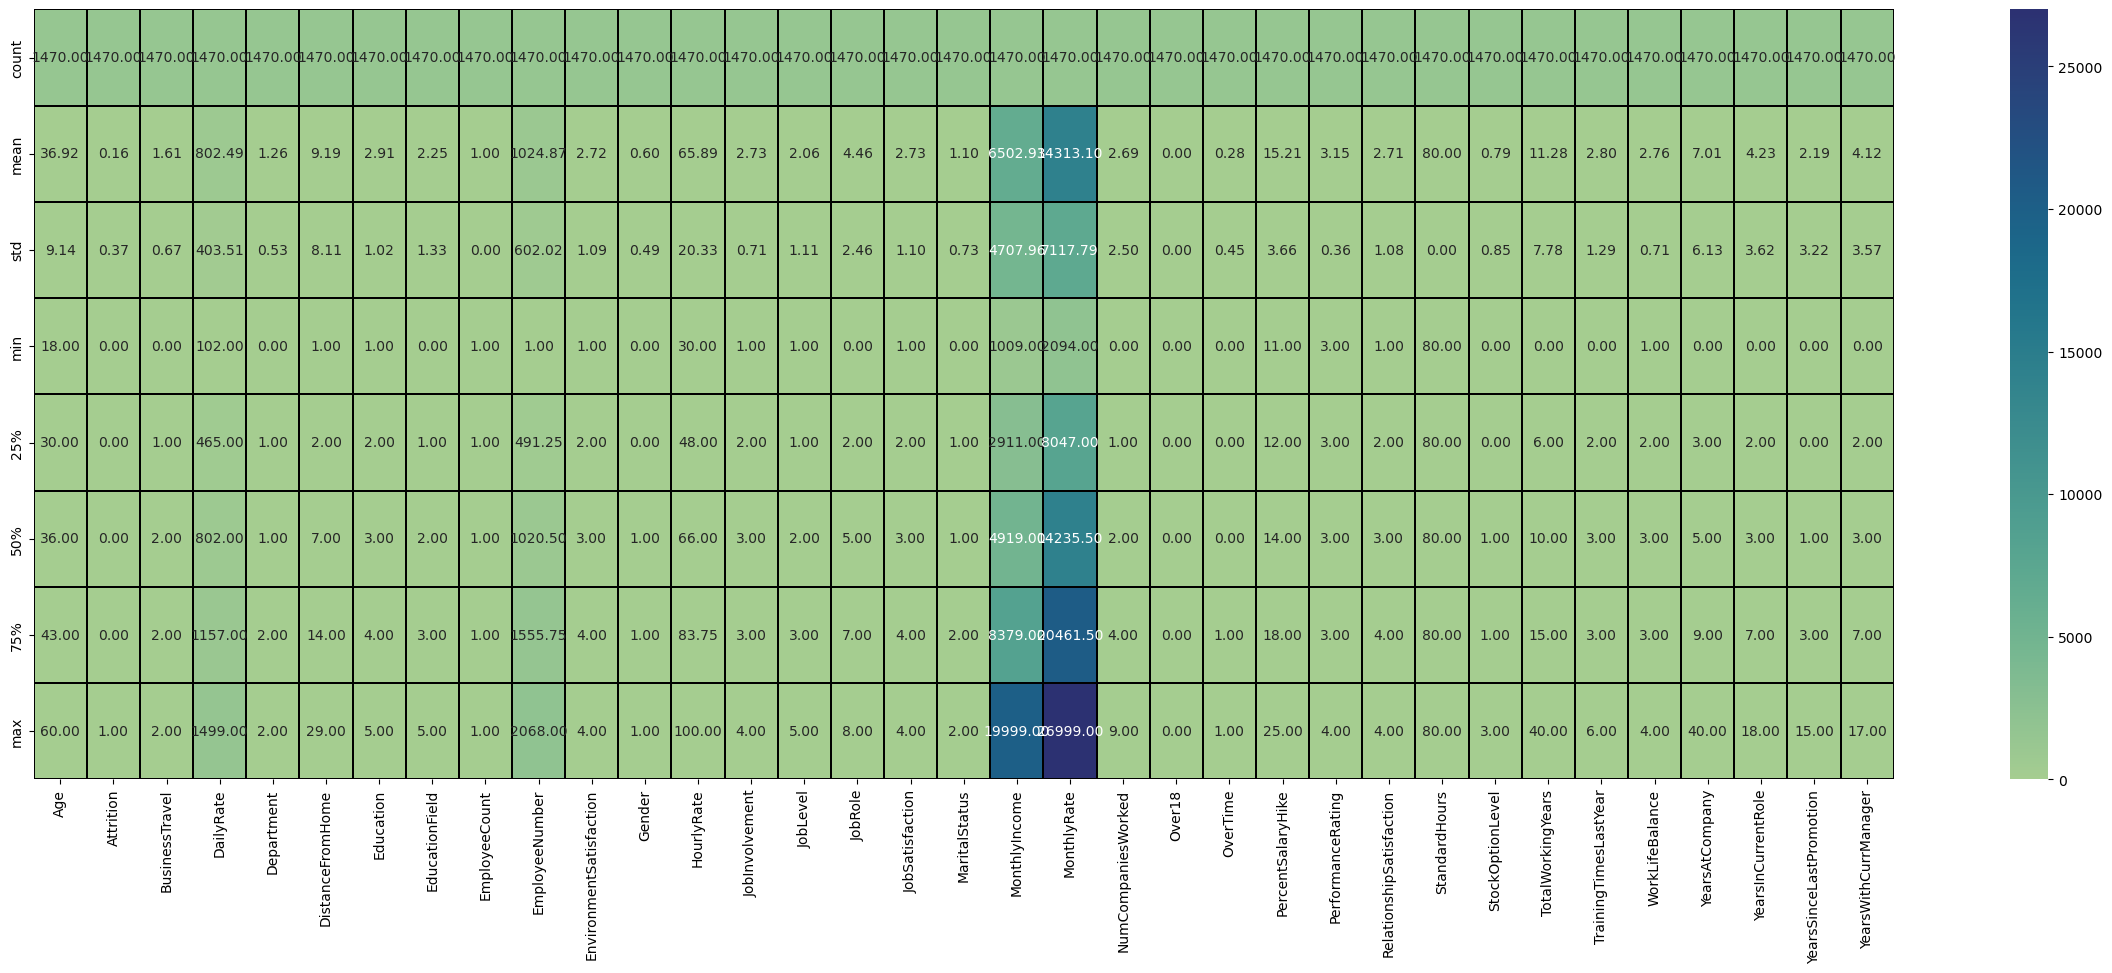

In [22]:
# same statistical summary can also be seen through heatmap
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(df.describe(),annot=True ,fmt='0.2f' ,linewidth=0.2,linecolor='black',cmap='crest' )

# CHECKING FOR SKEWNESS

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
a=df.columns[:16]
a

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole'],
      dtype='object')

In [27]:
b=df.columns[16:32]
b

Index(['JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [30]:
c=df.columns[32:]
c

Index(['YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

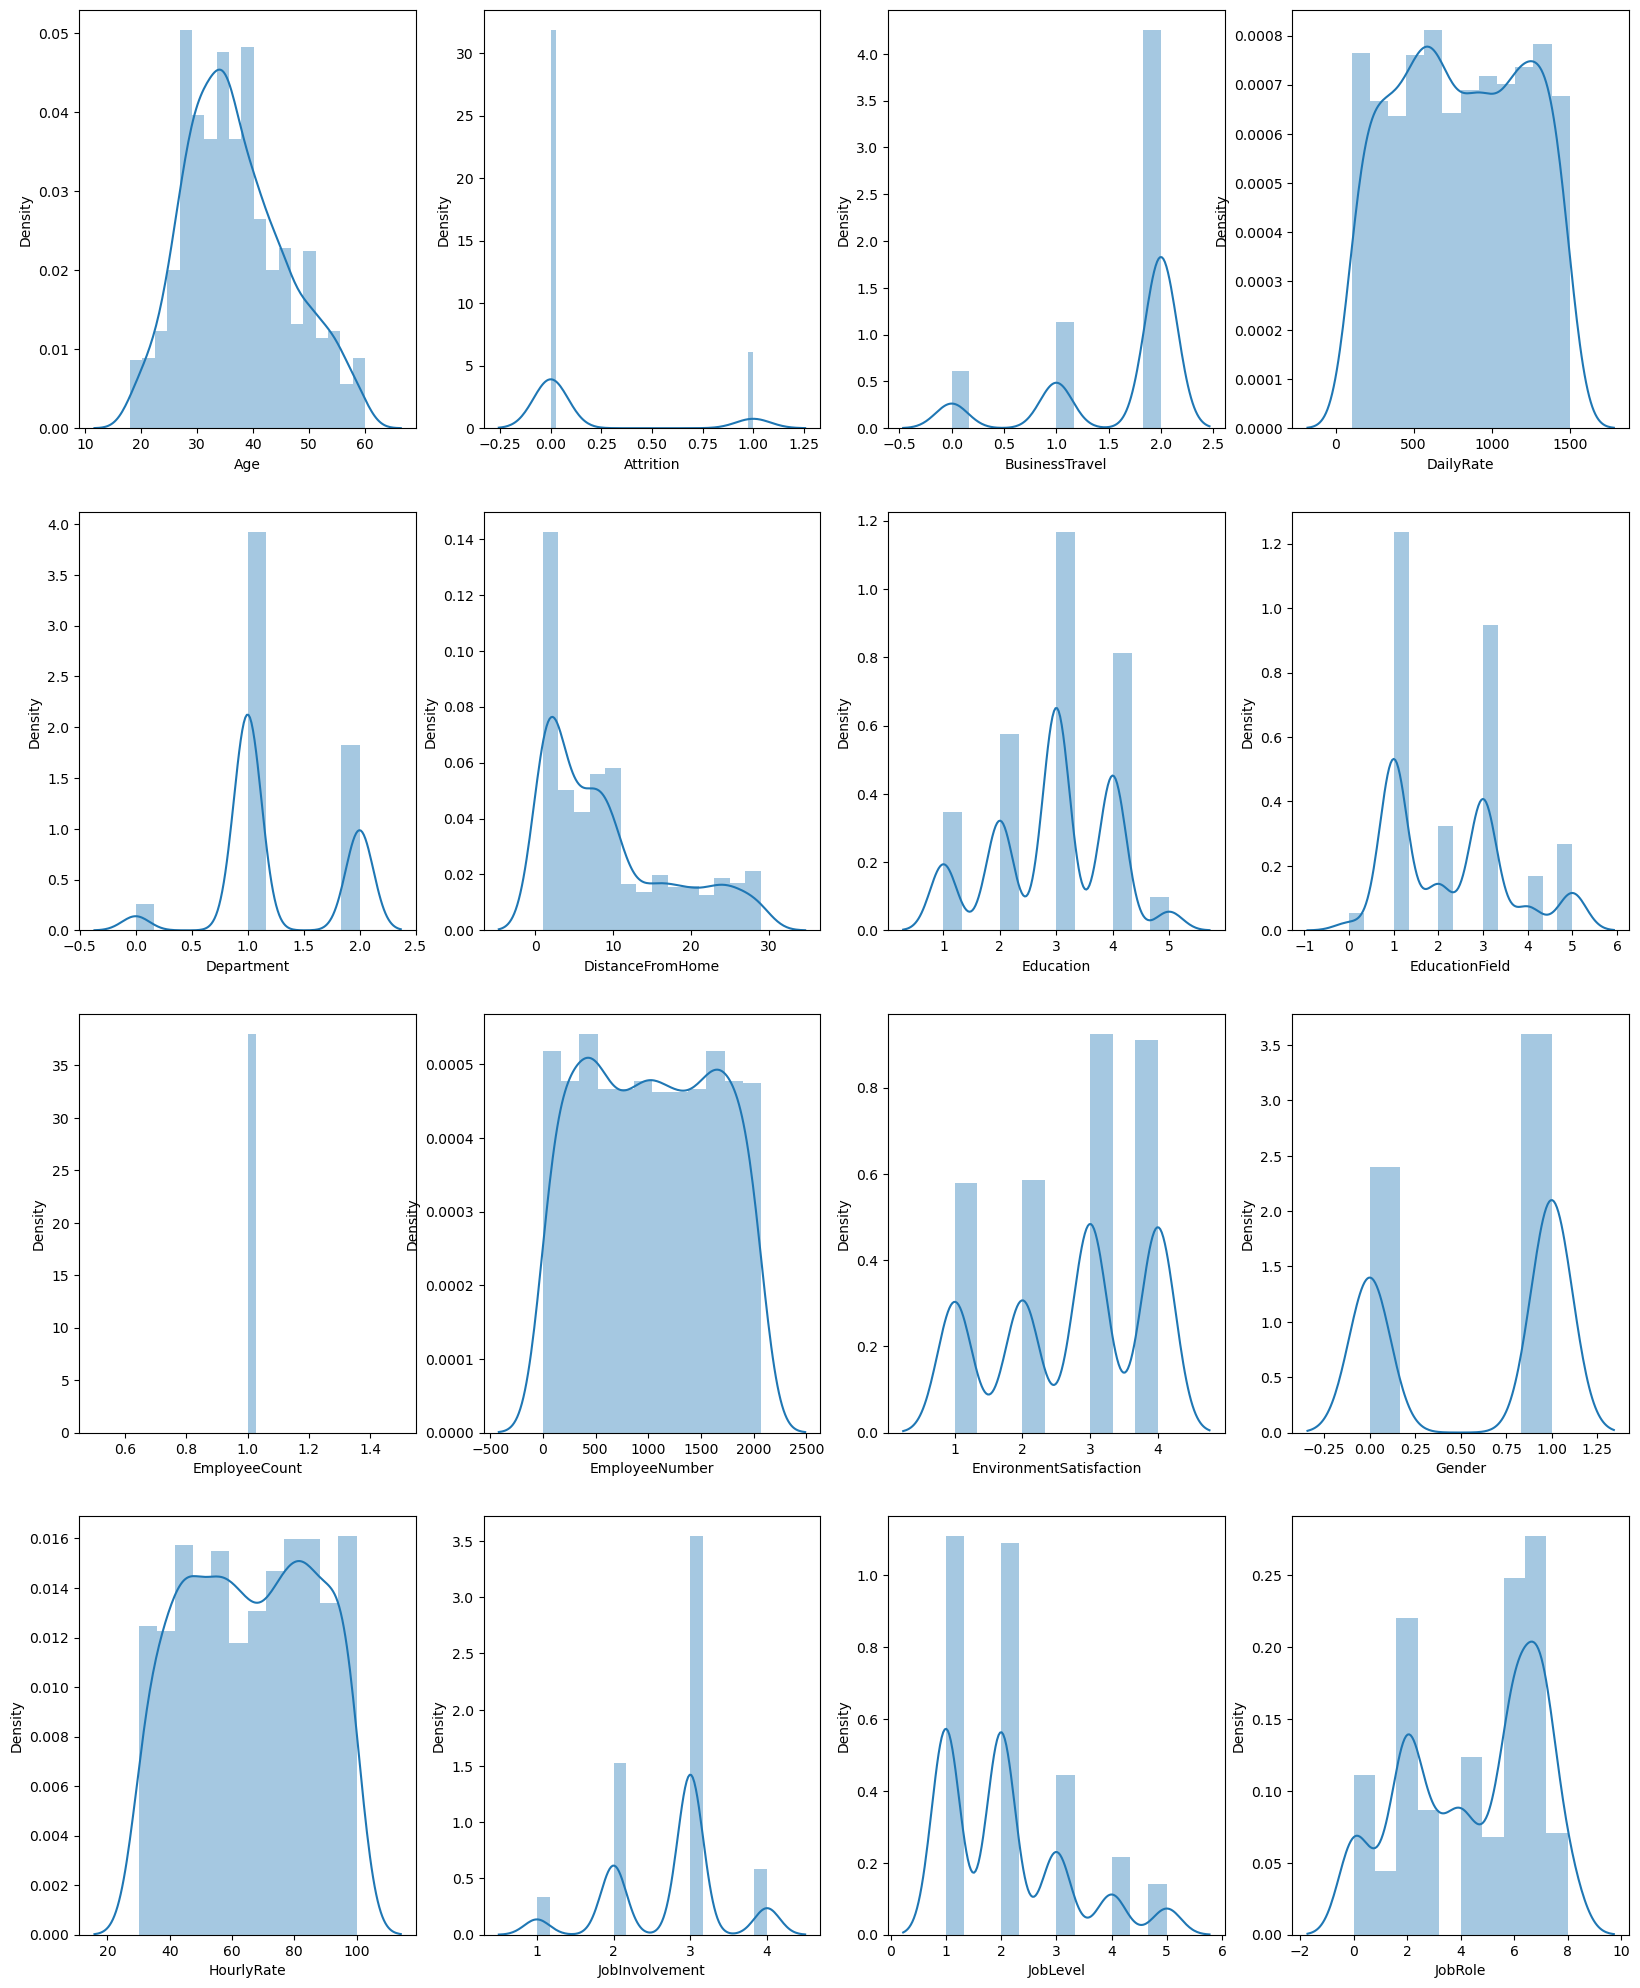

In [31]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1


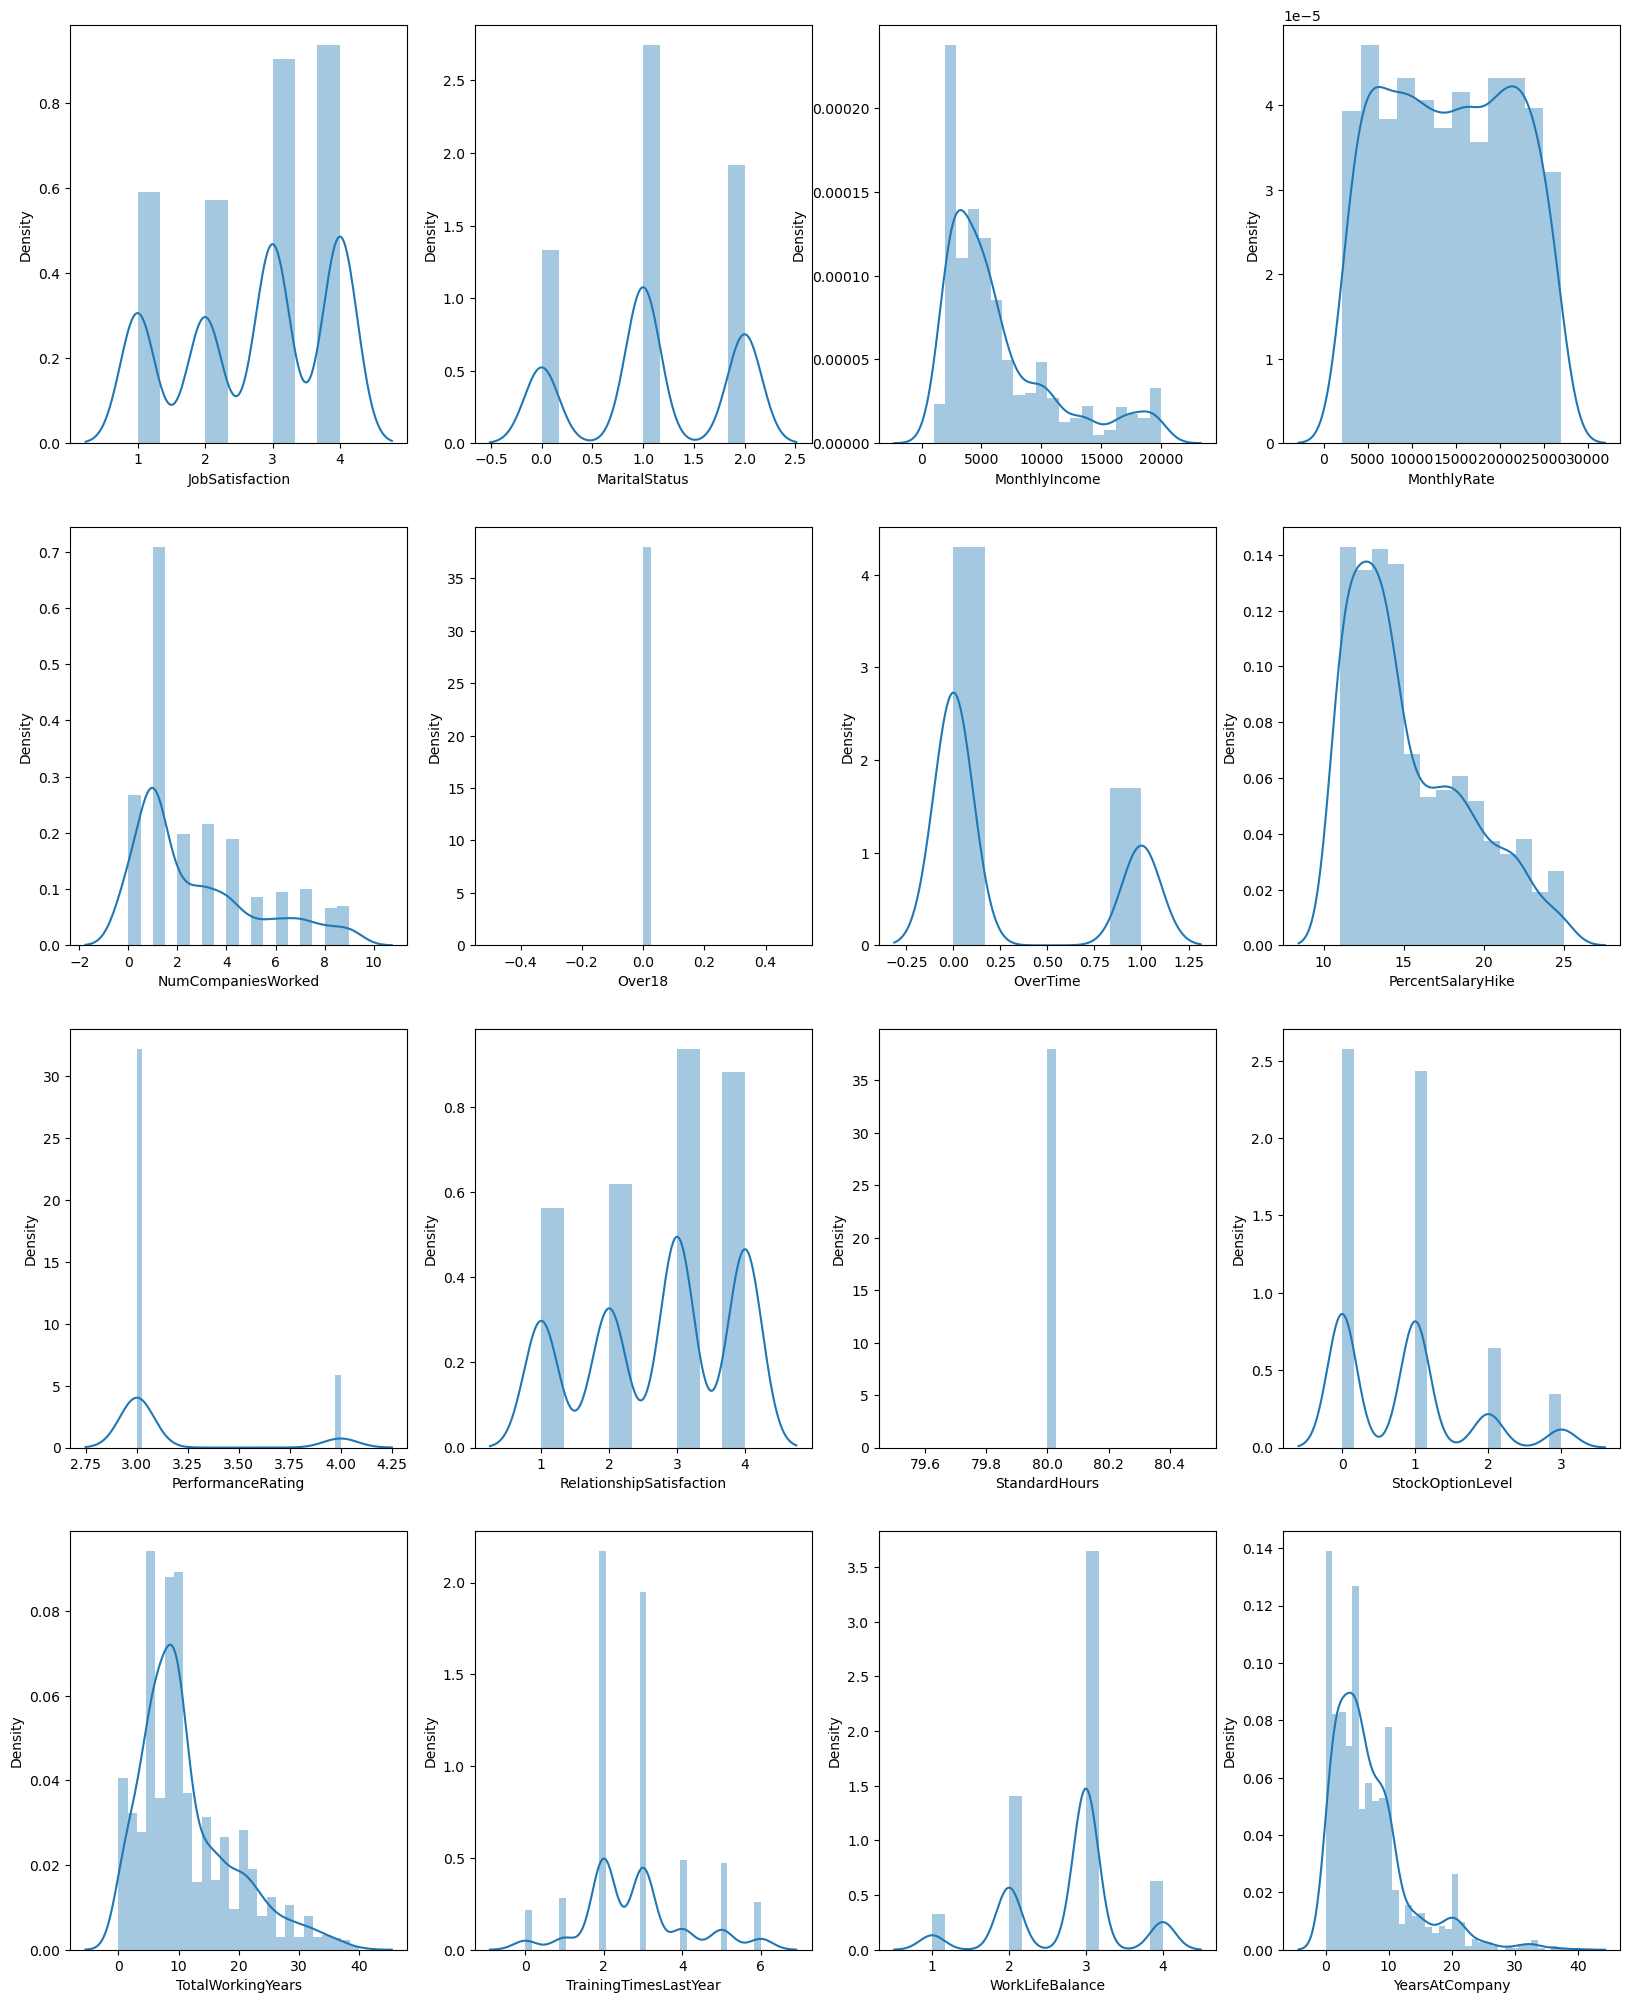

In [32]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

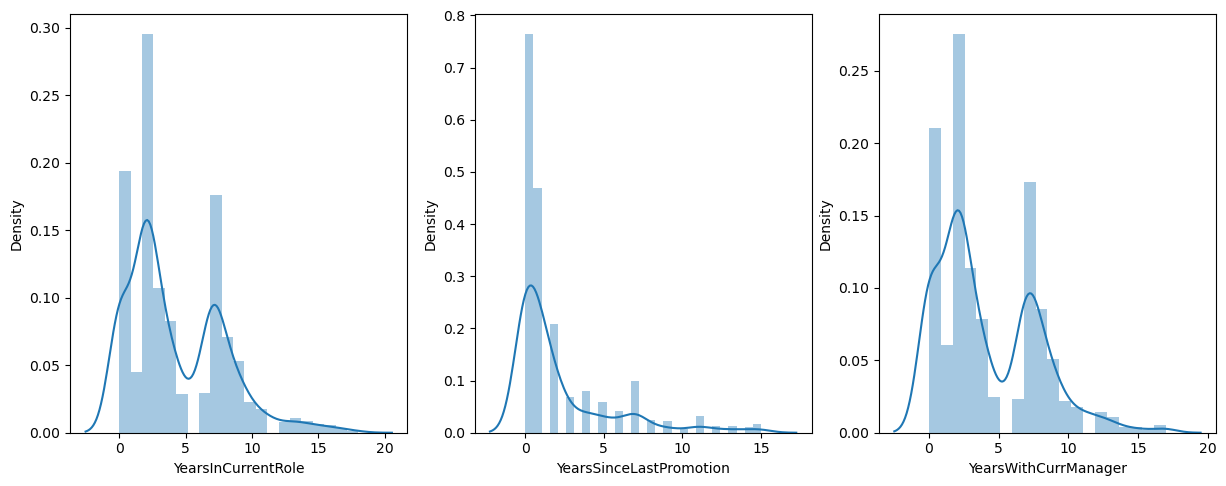

In [33]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in c:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can see from the distplot that there is skewness prent in the data 

# right skew:- age , distance from home(highly) , education field , job level(highly) ,monthly income(highly) ,
# num companies worked(highly) , overtime(highly) , percent slary hike(highly) , performance rating , stock option level(highly),
# total working hours(highly) , years at company(highly)  , years in current role(highly) , years since last promotion(highly),
# years with current manager(highly) 

# left skew:- bussiness travel(highly) , daily rate , department(highly) , education , environment satisfaction , gender ,
# job involvement , job role(highly) , job satisfaction , relationship satisfaction , work life balance

In [41]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [ ]:
# +ve sign means right skewed and -ve sign means left skewed. we can see most columns are right skewed here and acceptable range 
# is +0.5 to -0.5

In [48]:
#removing skewness using cuberoot method
df['DistanceFromHome']=np.cbrt(df['DistanceFromHome'])
df['JobLevel']=np.cbrt(df['JobLevel'])
df['MonthlyIncome']=np.cbrt(df['MonthlyIncome'])
df['NumCompaniesWorked']=np.cbrt(df['NumCompaniesWorked'])
df['OverTime']=np.cbrt(df['OverTime'])
df['PercentSalaryHike']=np.cbrt(df['PercentSalaryHike'])
df['PerformanceRating']=np.cbrt(df['PerformanceRating'])
df['StockOptionLevel']=np.cbrt(df['StockOptionLevel'])
df['TotalWorkingYears']=np.cbrt(df['TotalWorkingYears'])
df['YearsAtCompany']=np.cbrt(df['YearsAtCompany'])
df['YearsInCurrentRole']=np.cbrt(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion']=np.cbrt(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager']=np.cbrt(df['YearsWithCurrManager'])

In [49]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.186998
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.601248
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [50]:
df['MonthlyIncome']=np.cbrt(df['MonthlyIncome'])
df['NumCompaniesWorked']=np.cbrt(df['NumCompaniesWorked'])
df['OverTime']=np.cbrt(df['OverTime'])
df['PercentSalaryHike']=np.cbrt(df['PercentSalaryHike'])
df['PerformanceRating']=np.cbrt(df['PerformanceRating'])
df['YearsInCurrentRole']=np.cbrt(df['YearsInCurrentRole'])
df['YearsWithCurrManager']=np.cbrt(df['YearsWithCurrManager'])

In [51]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.186998
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.419614
MonthlyRate                 0.018578
NumCompaniesWorked         -1.909450
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.529881
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [ ]:
# maximum skewness is removed some columns skewness is not removing and some columns skewness is increaing so i've adjusted
# according to that to which skewness to be removed and which don't
# columns where skewness is removed :-attrition , business travel PerformanceRating , YearsInCurrentRole , YearsWithCurrManager
# etc

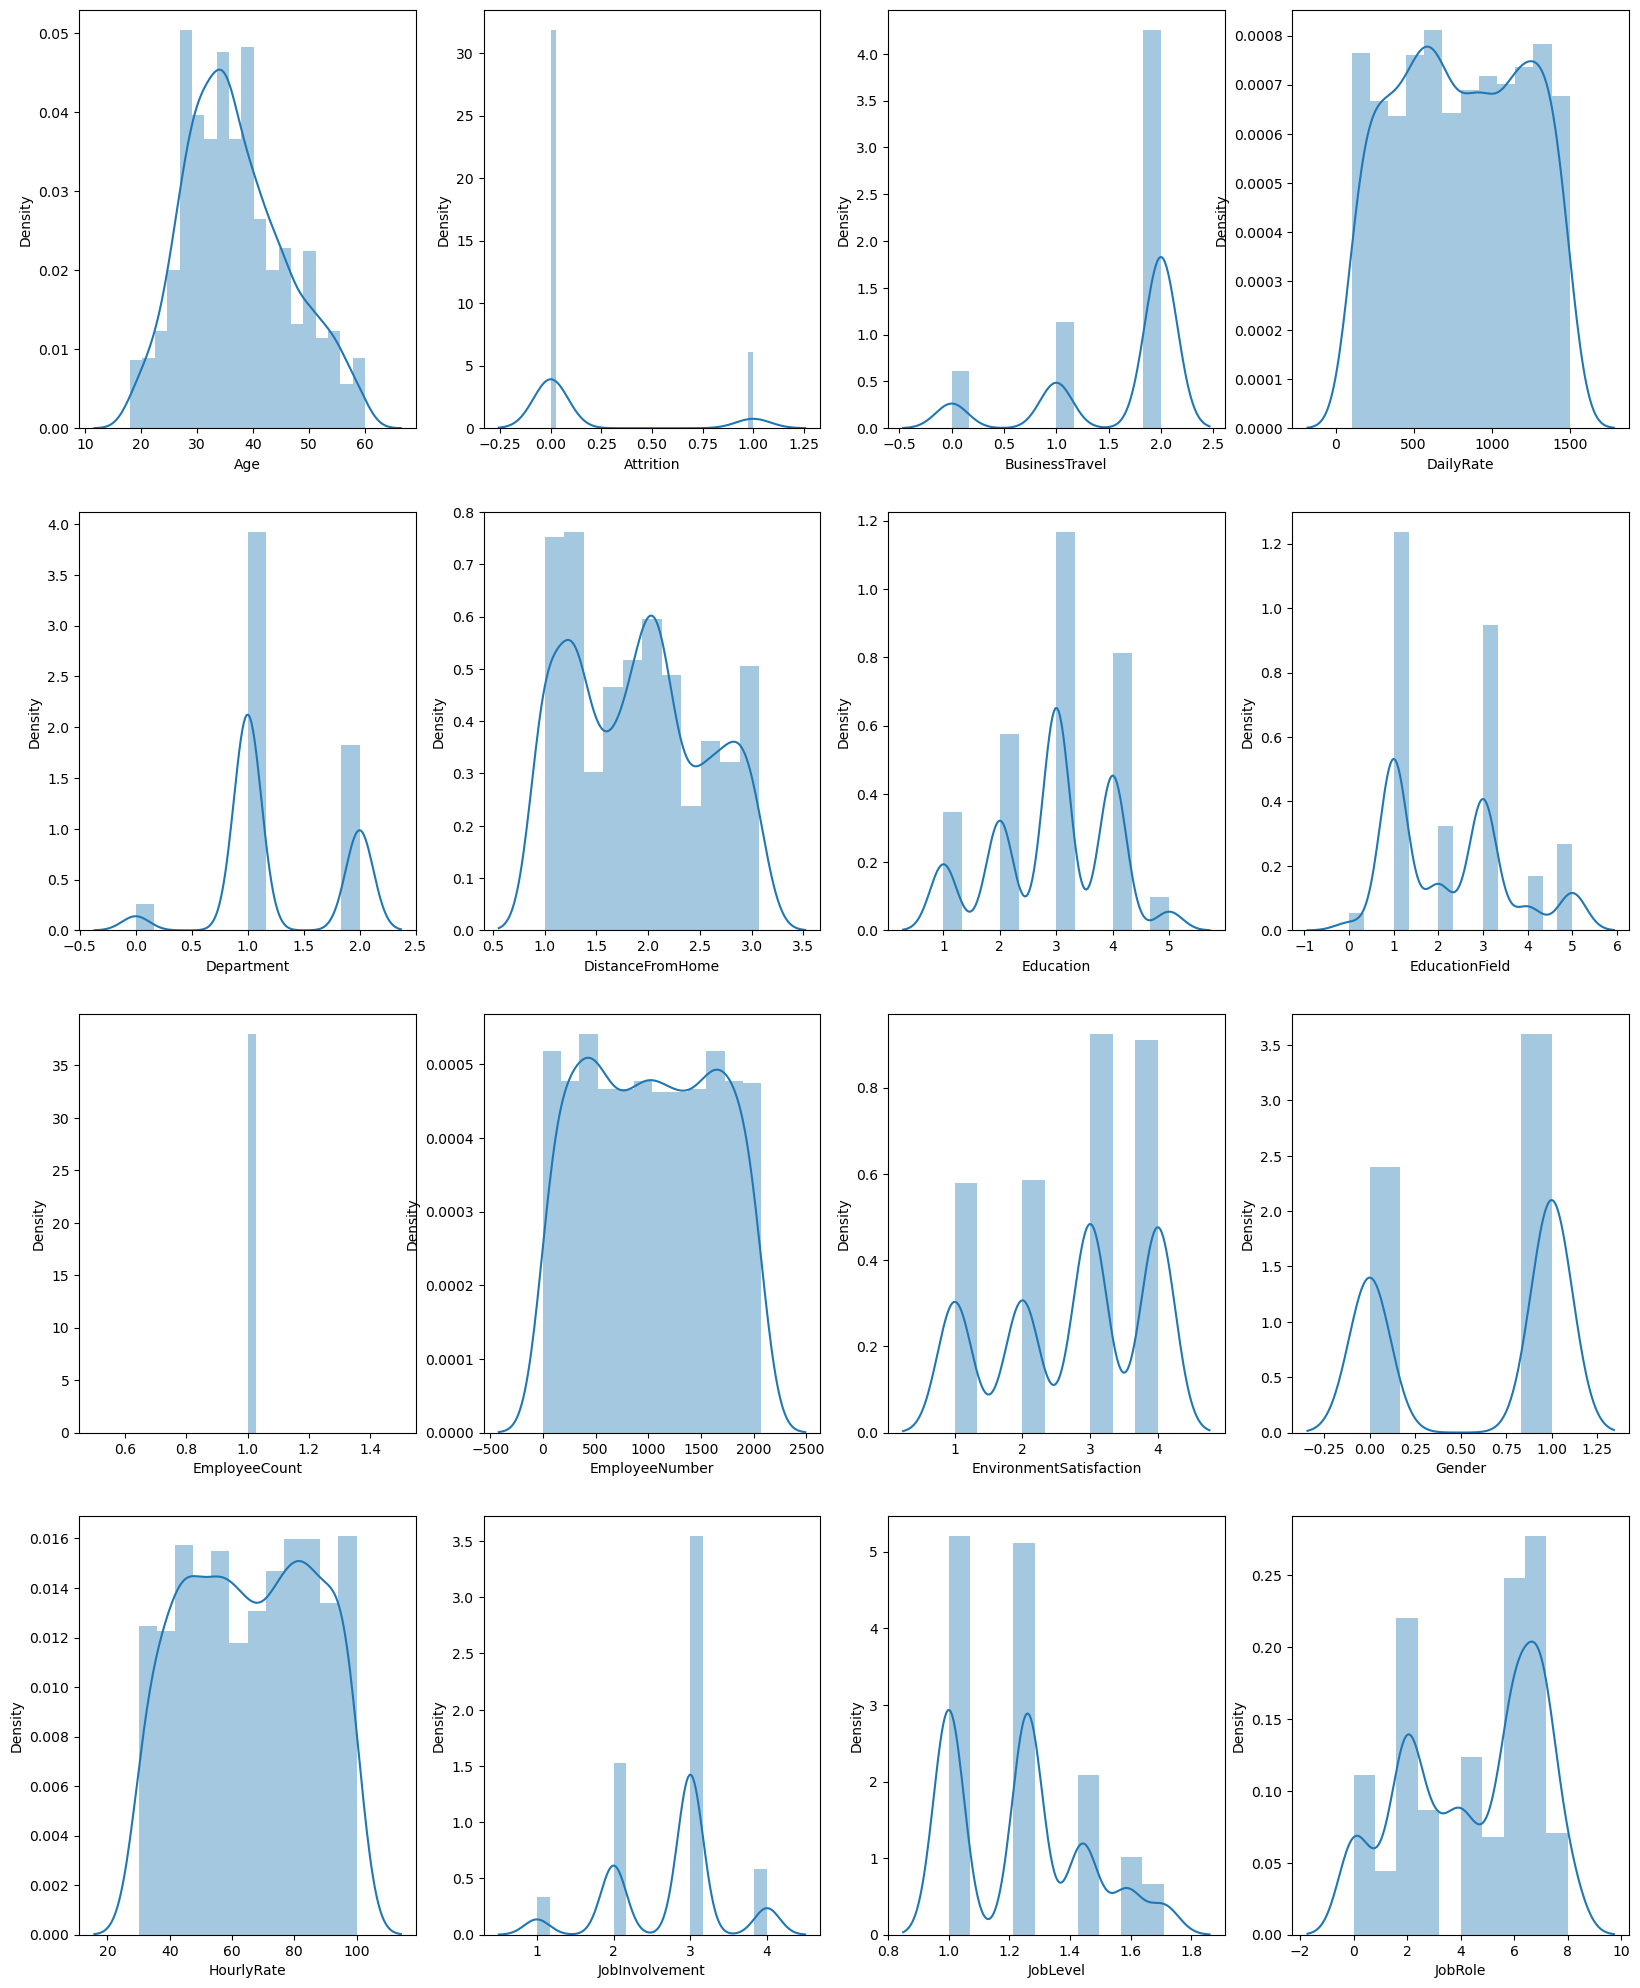

In [52]:
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1


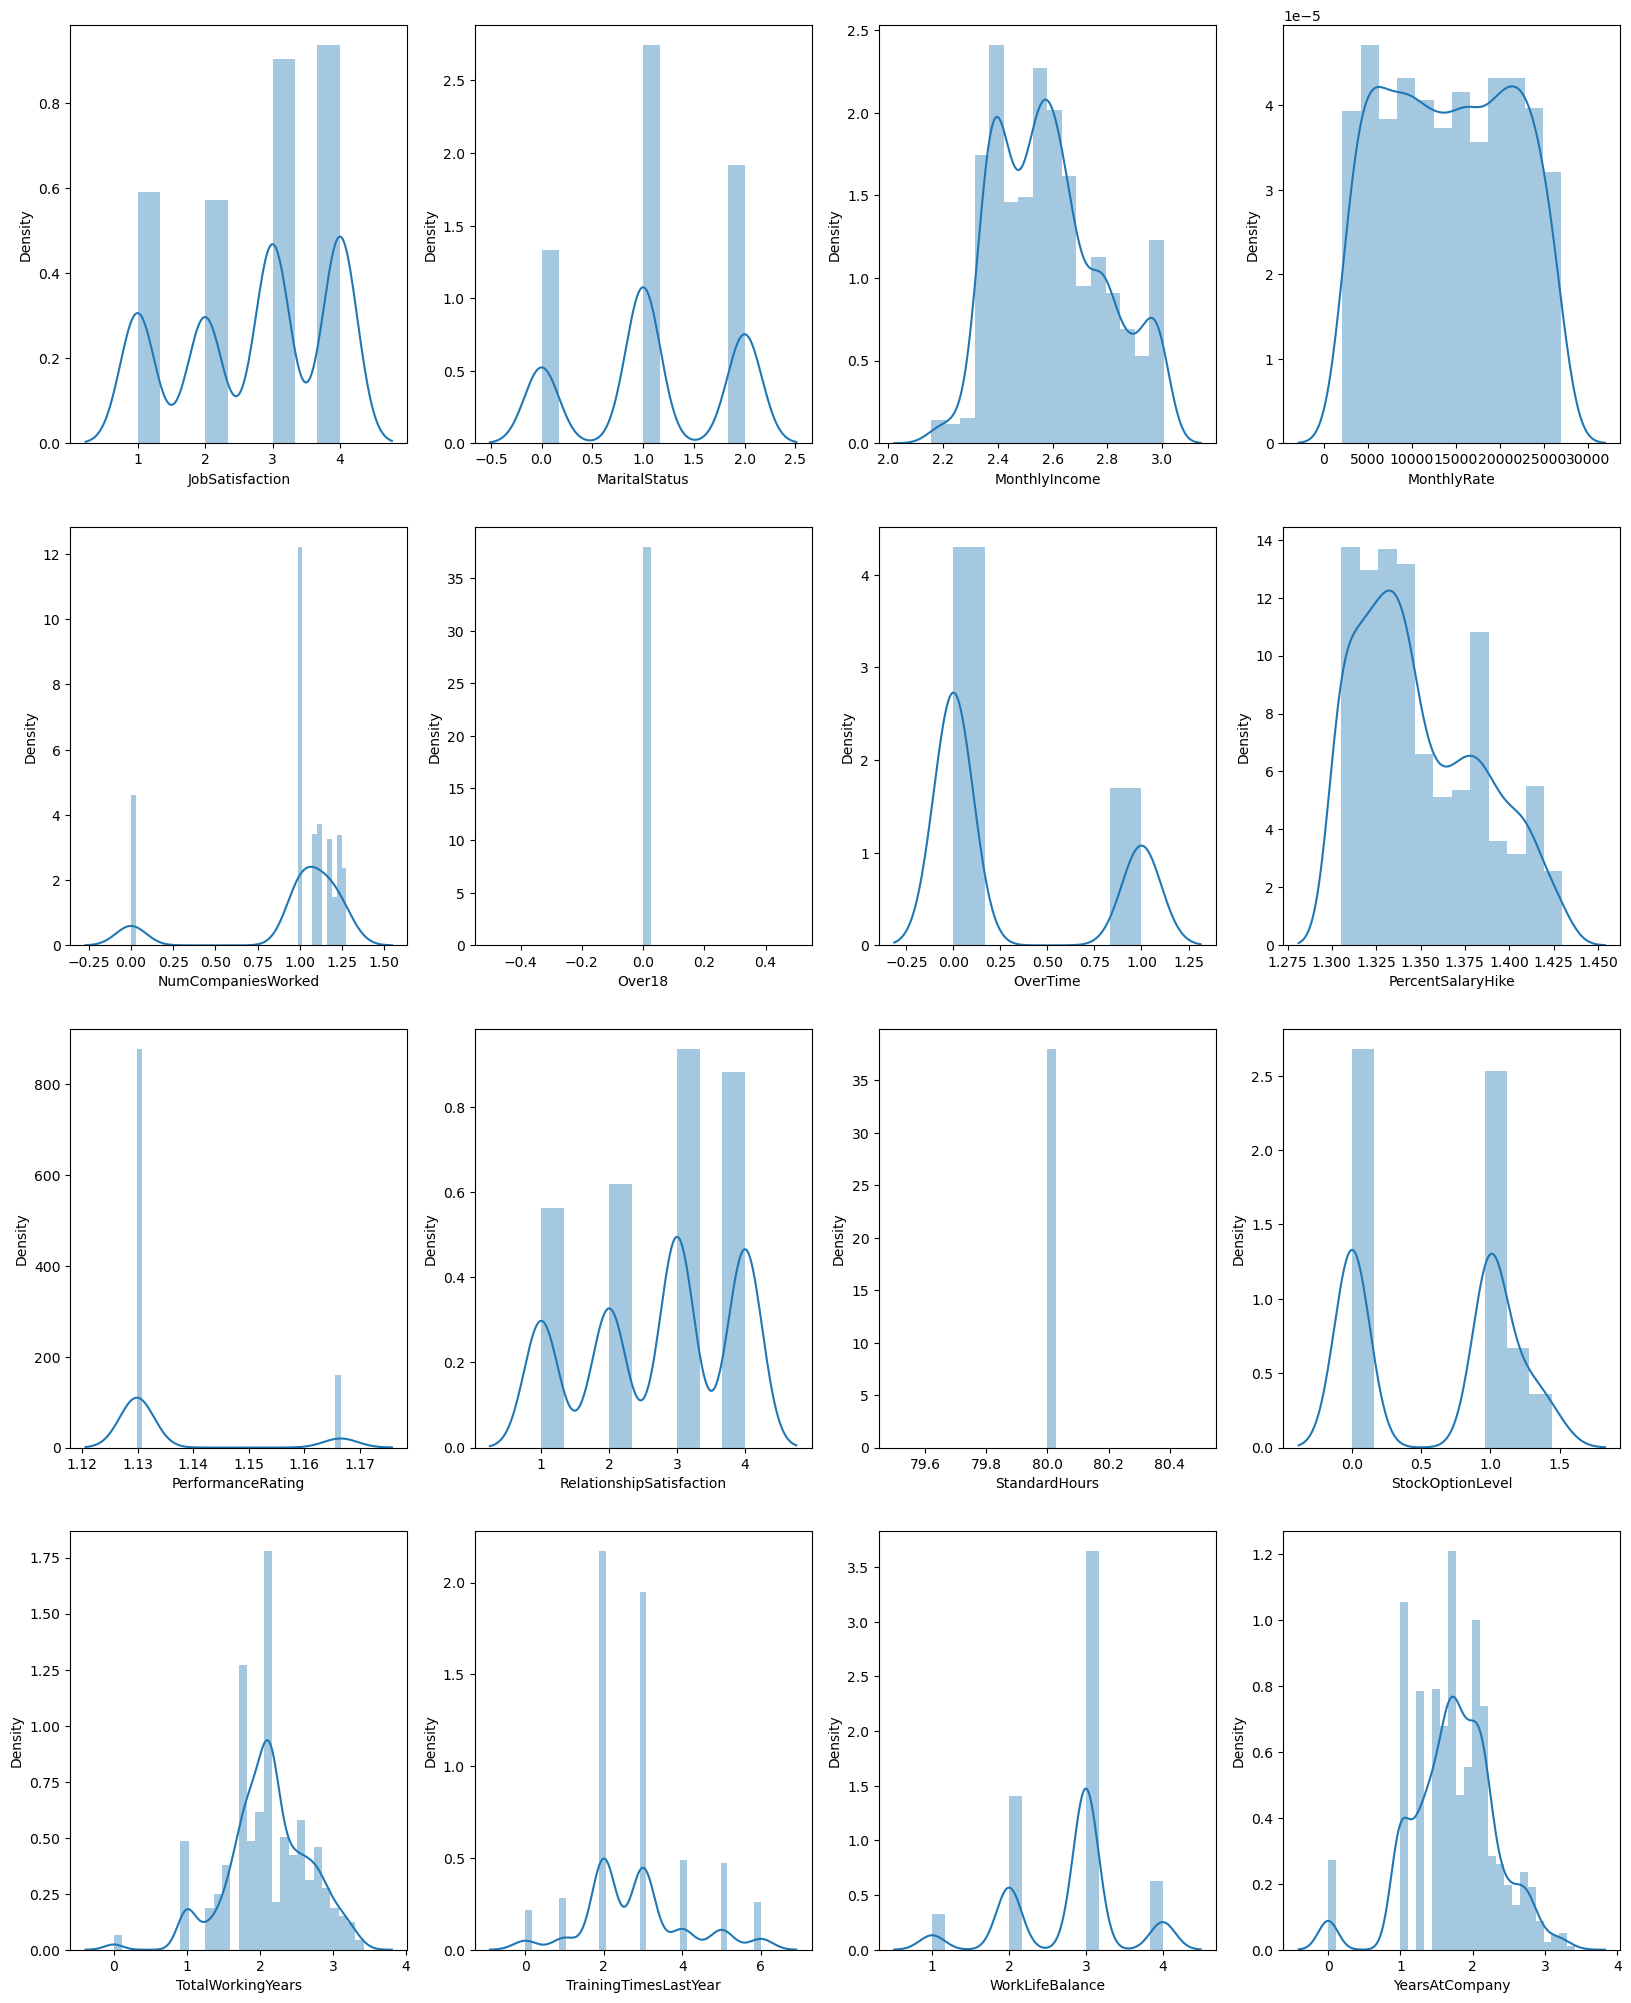

In [53]:
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

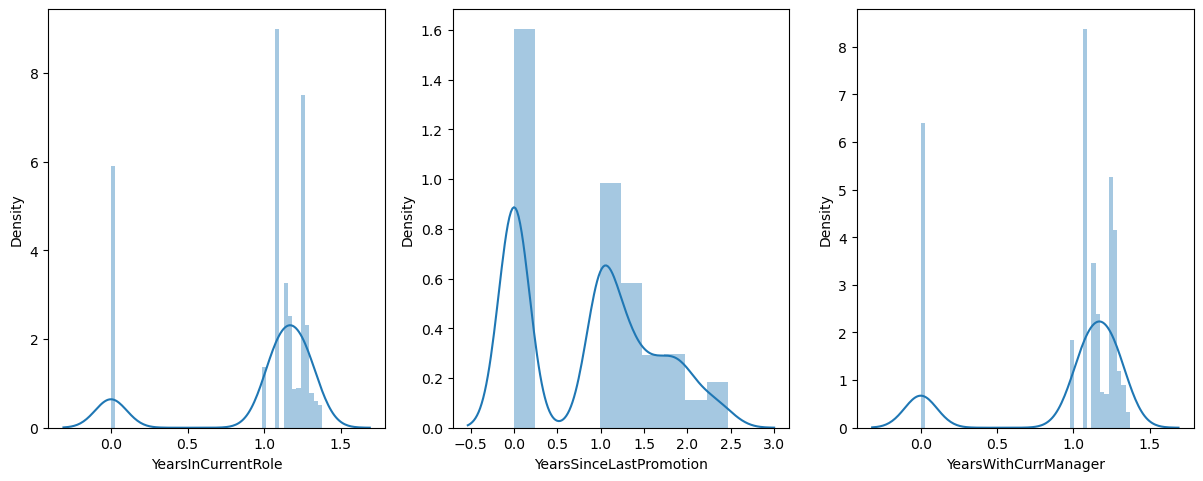

In [54]:
plt.figure(figsize=(20,25))
p=1
for i in c:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can now see that skewness is removed in colums to some extent

# CHECKING FOR OUTLIERS

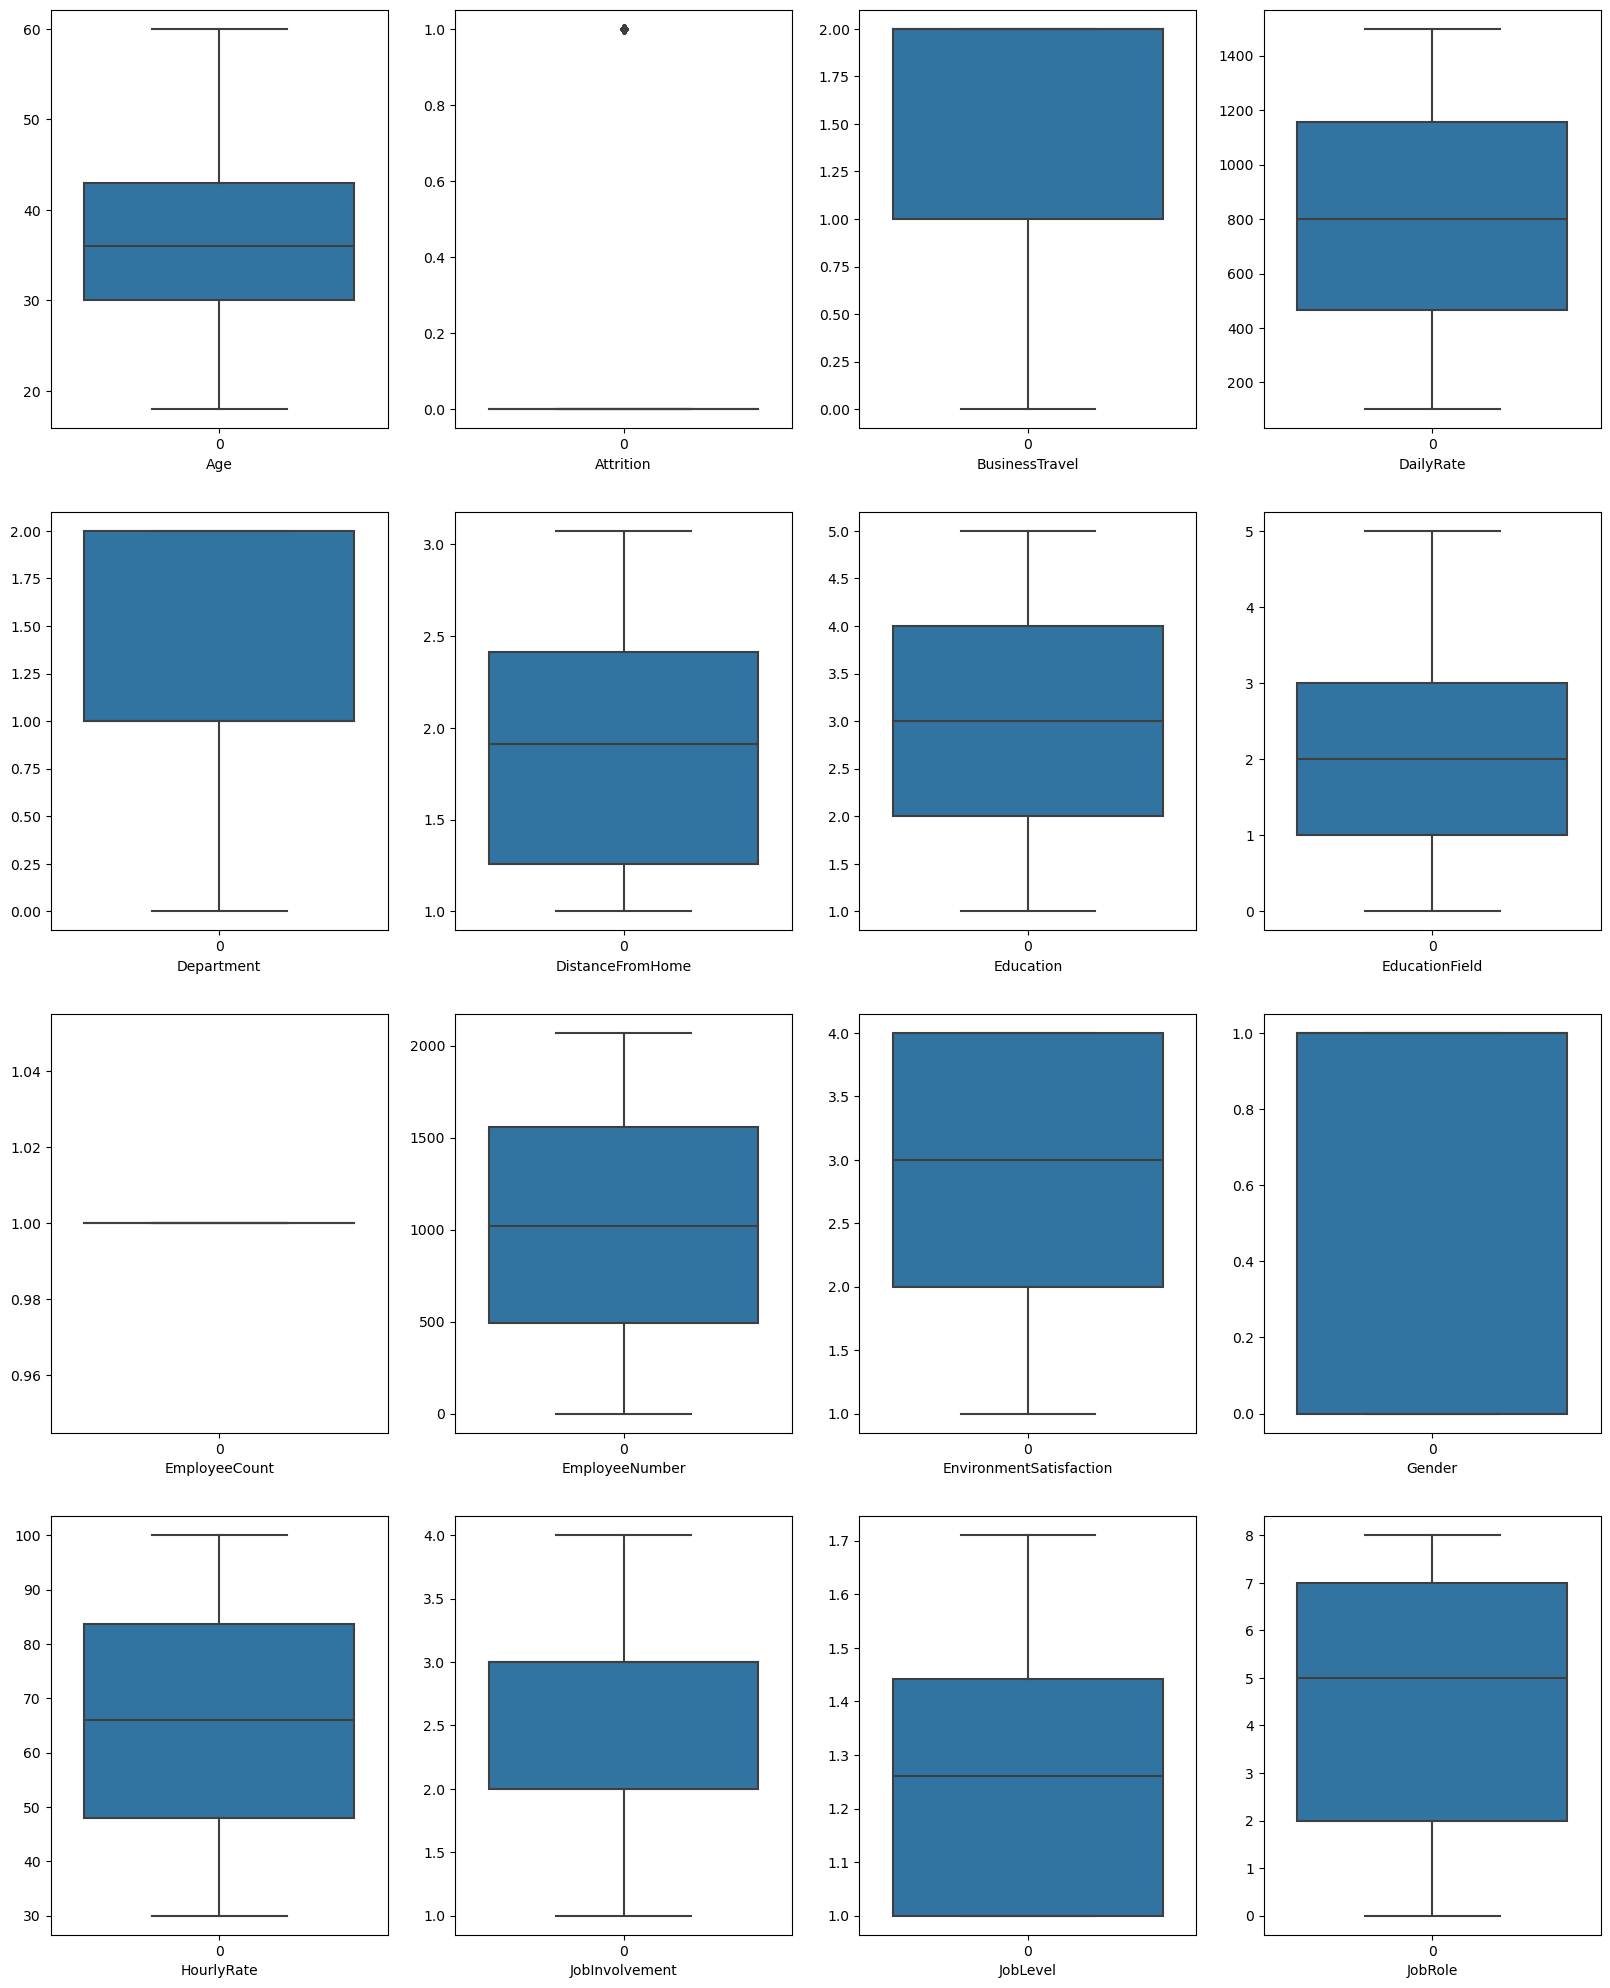

In [55]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


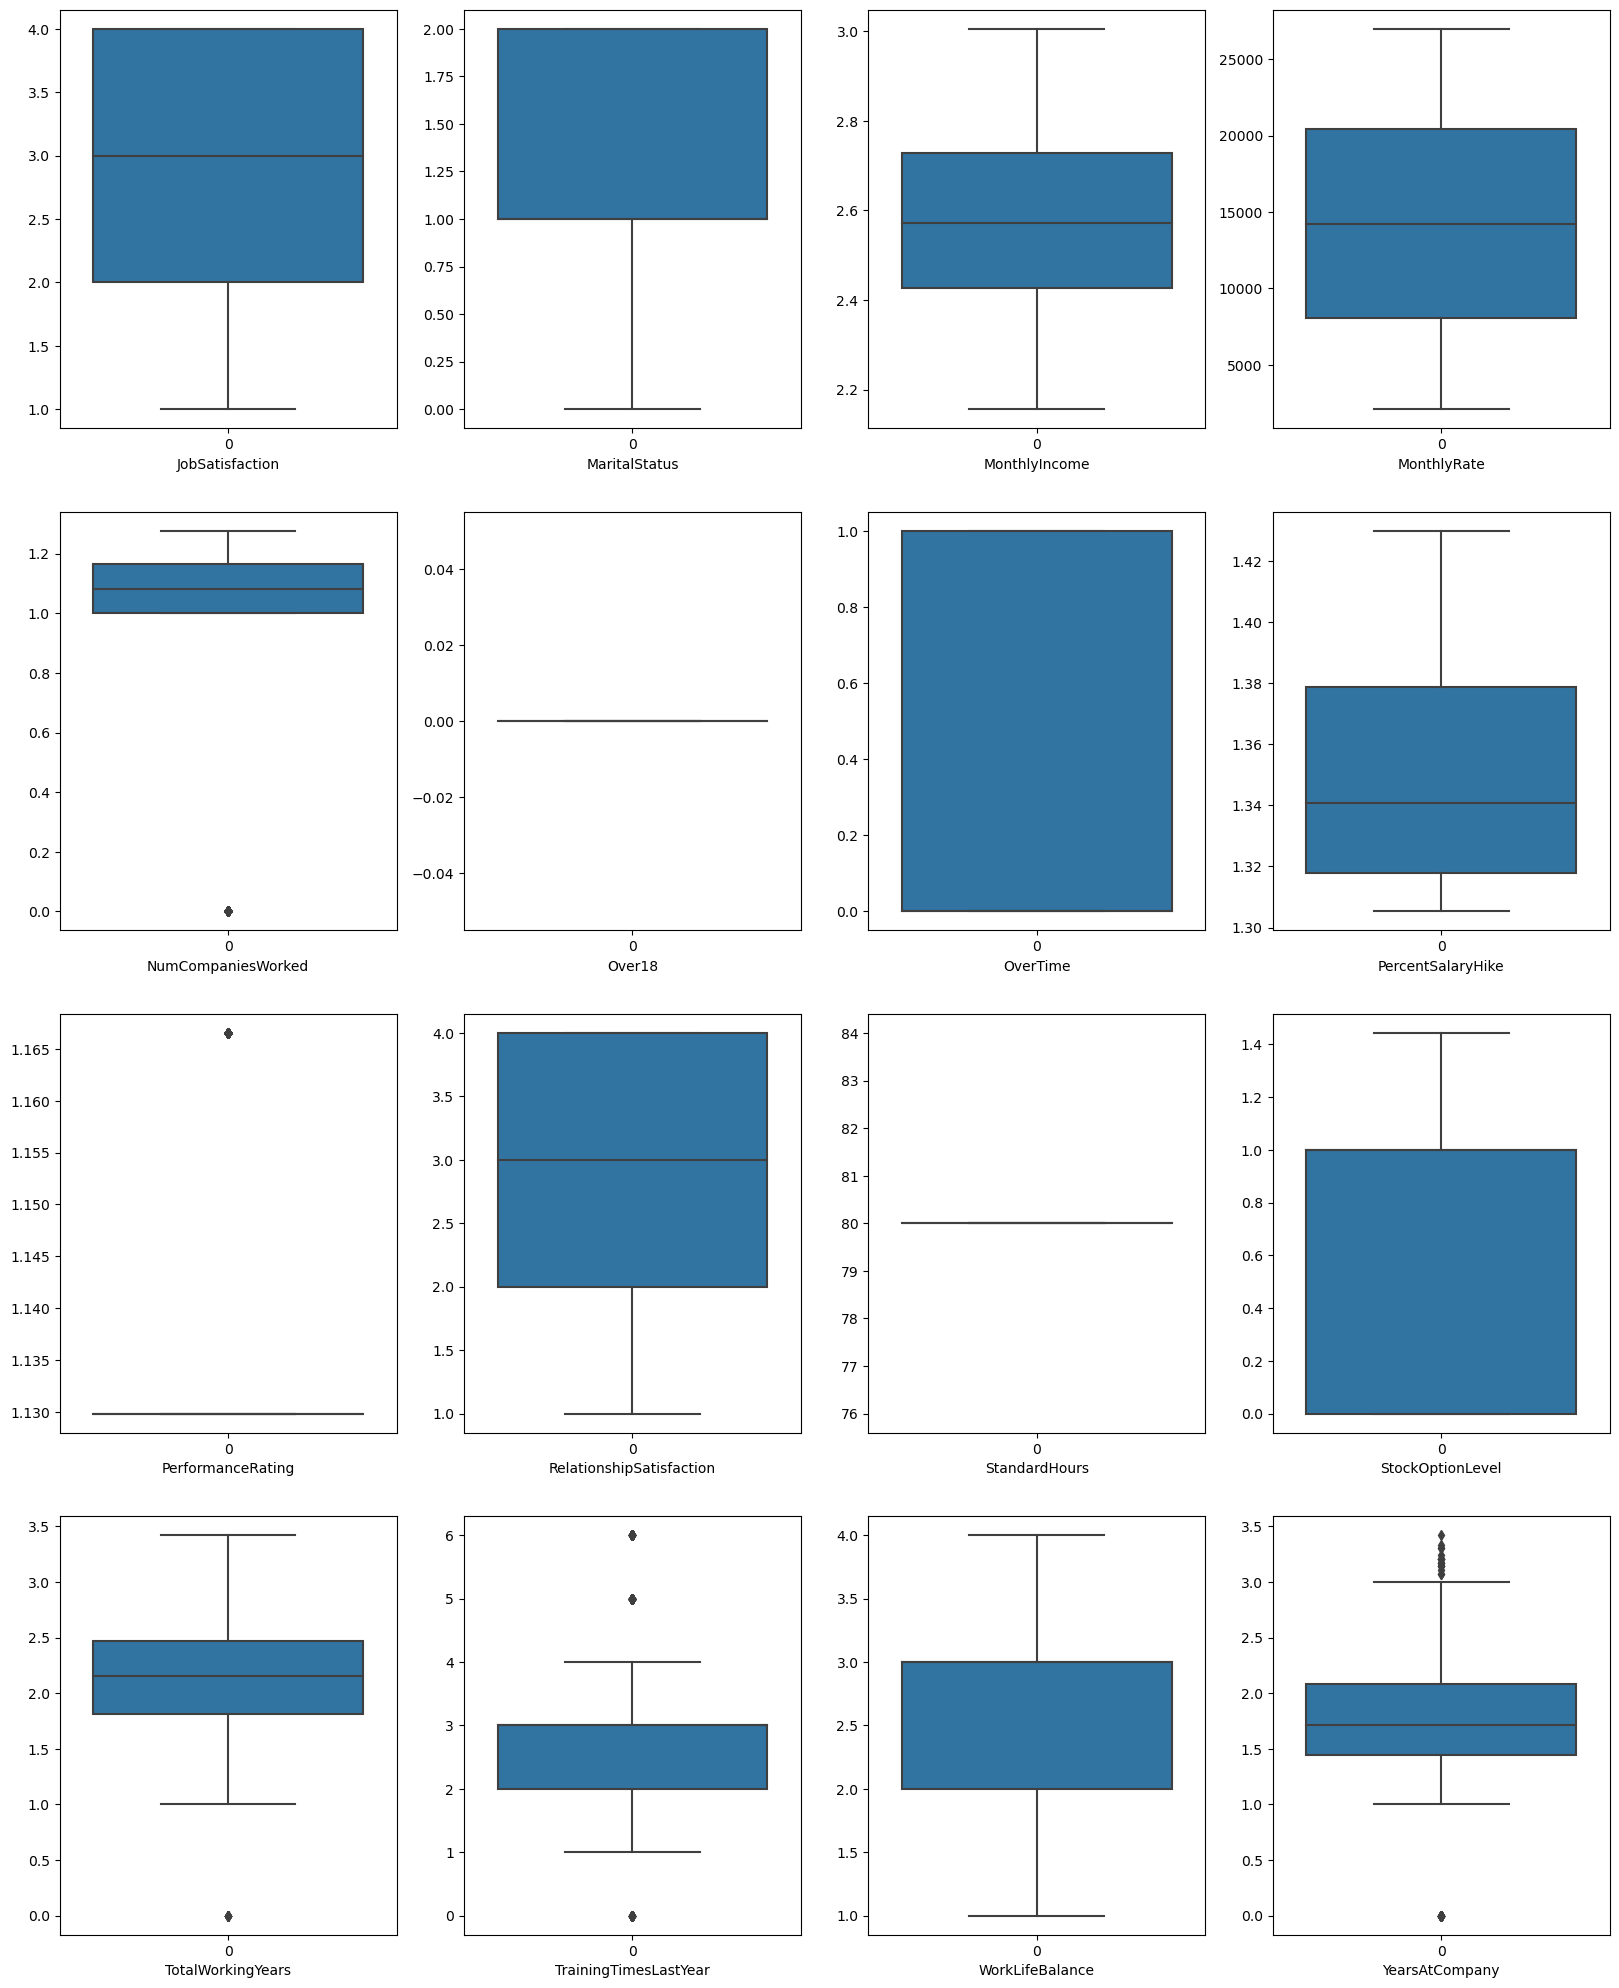

In [56]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


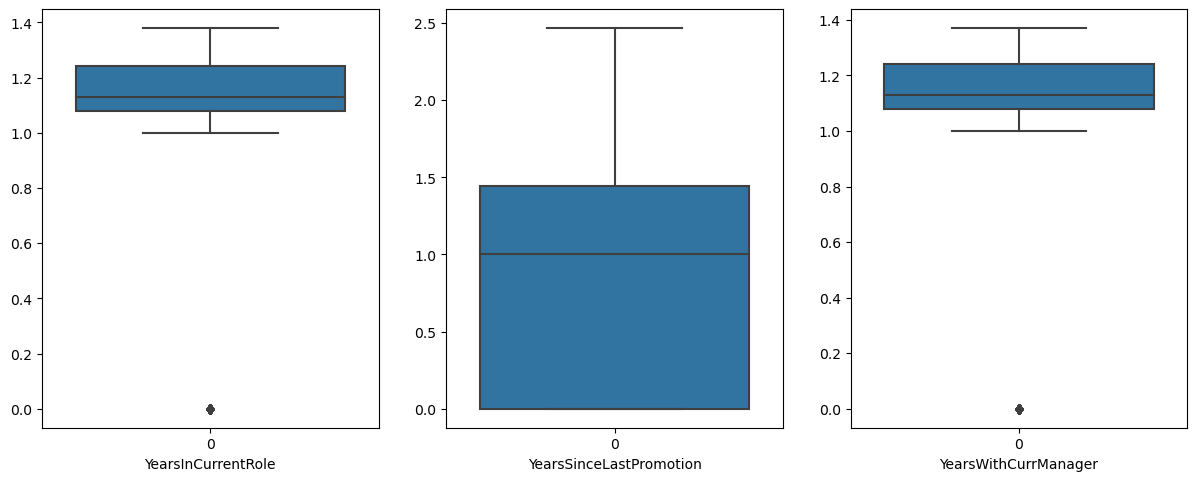

In [57]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in c:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from boxplot that there are outliers in some columns e.g:- num companies worked , performance rating , 
# total working hours , training times last year , years at company , years in current role , years with curr manager 

In [58]:
#removing outliers
from scipy.stats import zscore
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [91]:
d=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
z=np.abs(zscore(d))
z

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,1.412629,0.891688,0.937414,NaN,1.701283,0.660531,...,1.584178,NaN,1.127326,0.204222,2.171982,2.493820,0.127705,0.428703,1.110010,0.517545
1,1.322365,0.913194,1.297775,0.493817,0.159829,1.868426,0.937414,NaN,1.699621,0.254625,...,1.191438,NaN,0.678540,0.076388,0.155707,0.338096,0.703698,0.597476,0.198021,0.617491
2,0.008343,0.590048,1.414363,0.493817,1.003914,0.891688,1.316673,NaN,1.696298,1.169781,...,0.658973,NaN,1.127326,0.362426,0.155707,0.338096,2.975183,2.202065,1.110010,2.106161
3,0.429664,0.913194,1.461466,0.493817,0.717210,1.061787,0.937414,NaN,1.694636,1.169781,...,0.266233,NaN,1.127326,0.204222,0.155707,0.338096,0.439987,0.597476,0.776497,2.106161
4,1.086676,0.590048,0.524295,0.493817,1.003914,1.868426,0.565311,NaN,1.691313,1.575686,...,1.191438,NaN,0.678540,0.536515,0.155707,0.338096,0.823761,0.233697,0.538006,0.263573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.913194,0.202082,0.493817,1.486775,0.891688,0.565311,NaN,1.721670,0.254625,...,0.266233,NaN,0.678540,0.833802,0.155707,0.338096,0.055254,0.233697,1.110010,0.372775
1466,0.227347,0.590048,0.469754,0.493817,0.127741,1.868426,0.565311,NaN,1.723332,1.169781,...,1.584178,NaN,0.678540,0.058709,1.707500,0.338096,0.291310,0.597476,0.198021,0.617491
1467,1.086676,0.590048,1.605183,0.493817,0.488966,0.085049,0.937414,NaN,1.726655,0.660531,...,0.658973,NaN,0.678540,0.536515,2.171982,0.338096,0.127705,0.233697,1.110010,0.372775
1468,1.322365,0.913194,0.546677,1.401512,1.003914,0.085049,0.565311,NaN,1.728317,1.169781,...,1.191438,NaN,1.127326,0.833802,0.155707,1.077862,0.576737,0.549934,1.110010,0.658202


In [ ]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data

In [92]:
#threshold=3
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([  23,  127,  296,  301,  457,  615,  727,  828,  972, 1153, 1311],
       dtype=int64),
 array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27], dtype=int64))

In [93]:
import numpy as np  
outlier_indices = np.where(z > 3)[0]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (1470, 35)
DataFrame Shape after Removing Outliers: (1459, 35)


In [94]:
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 0.74% we lose 0.74% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

0.7482993197278911

# CHECK FOR CORRELATION AND MULTICOLLINEARTY

In [95]:
df1.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.150101,0.010058,0.006435,-0.029012,-0.018335,0.203563,-0.043581,NaN,-0.013970,...,0.062219,NaN,0.058985,0.660900,-0.018678,-0.019898,0.245843,0.093985,0.165134,0.084646
Attrition,-0.150101,1.000000,0.002391,-0.053152,0.059416,0.080172,-0.025176,0.027095,NaN,-0.007998,...,-0.052456,NaN,-0.179421,-0.211179,-0.052466,-0.067788,-0.180718,-0.173111,-0.049232,-0.203420
BusinessTravel,0.010058,0.002391,1.000000,-0.004513,-0.012253,-0.016253,-0.002895,0.024573,NaN,-0.010488,...,-0.030690,NaN,-0.020102,0.015962,0.018900,-0.011997,-0.027249,-0.041674,-0.039550,-0.012354
DailyRate,0.006435,-0.053152,-0.004513,1.000000,0.005986,-0.003773,-0.021454,0.036652,NaN,-0.054940,...,0.010590,NaN,0.038467,0.014227,-0.000081,-0.036009,-0.019641,0.011496,-0.042123,0.026693
Department,-0.029012,0.059416,-0.012253,0.005986,1.000000,0.025130,0.009420,0.012370,NaN,-0.009209,...,-0.022023,NaN,-0.011149,-0.003018,0.040351,0.025149,0.016439,0.019200,0.020211,0.005507
DistanceFromHome,-0.018335,0.080172,-0.016253,-0.003773,0.025130,1.000000,0.022054,0.006432,NaN,0.037502,...,0.008512,NaN,0.026475,-0.002699,-0.021582,-0.019907,0.008388,0.019942,0.001210,-0.003813
Education,0.203563,-0.025176,-0.002895,-0.021454,0.009420,0.022054,1.000000,-0.040086,NaN,0.040455,...,-0.004536,NaN,0.010474,0.165018,-0.028434,0.010491,0.050889,0.036459,0.026163,0.024260
EducationField,-0.043581,0.027095,0.024573,0.036652,0.012370,0.006432,-0.040086,1.000000,NaN,-0.004654,...,-0.002382,NaN,-0.020521,-0.021488,0.051510,0.043608,-0.009622,0.028200,0.009212,0.029450
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.013970,-0.007998,-0.010488,-0.054940,-0.009209,0.037502,0.040455,-0.004654,NaN,1.000000,...,-0.068835,NaN,0.053712,-0.011739,0.024994,0.010535,0.002877,0.009765,0.007036,0.007551


<Axes: >

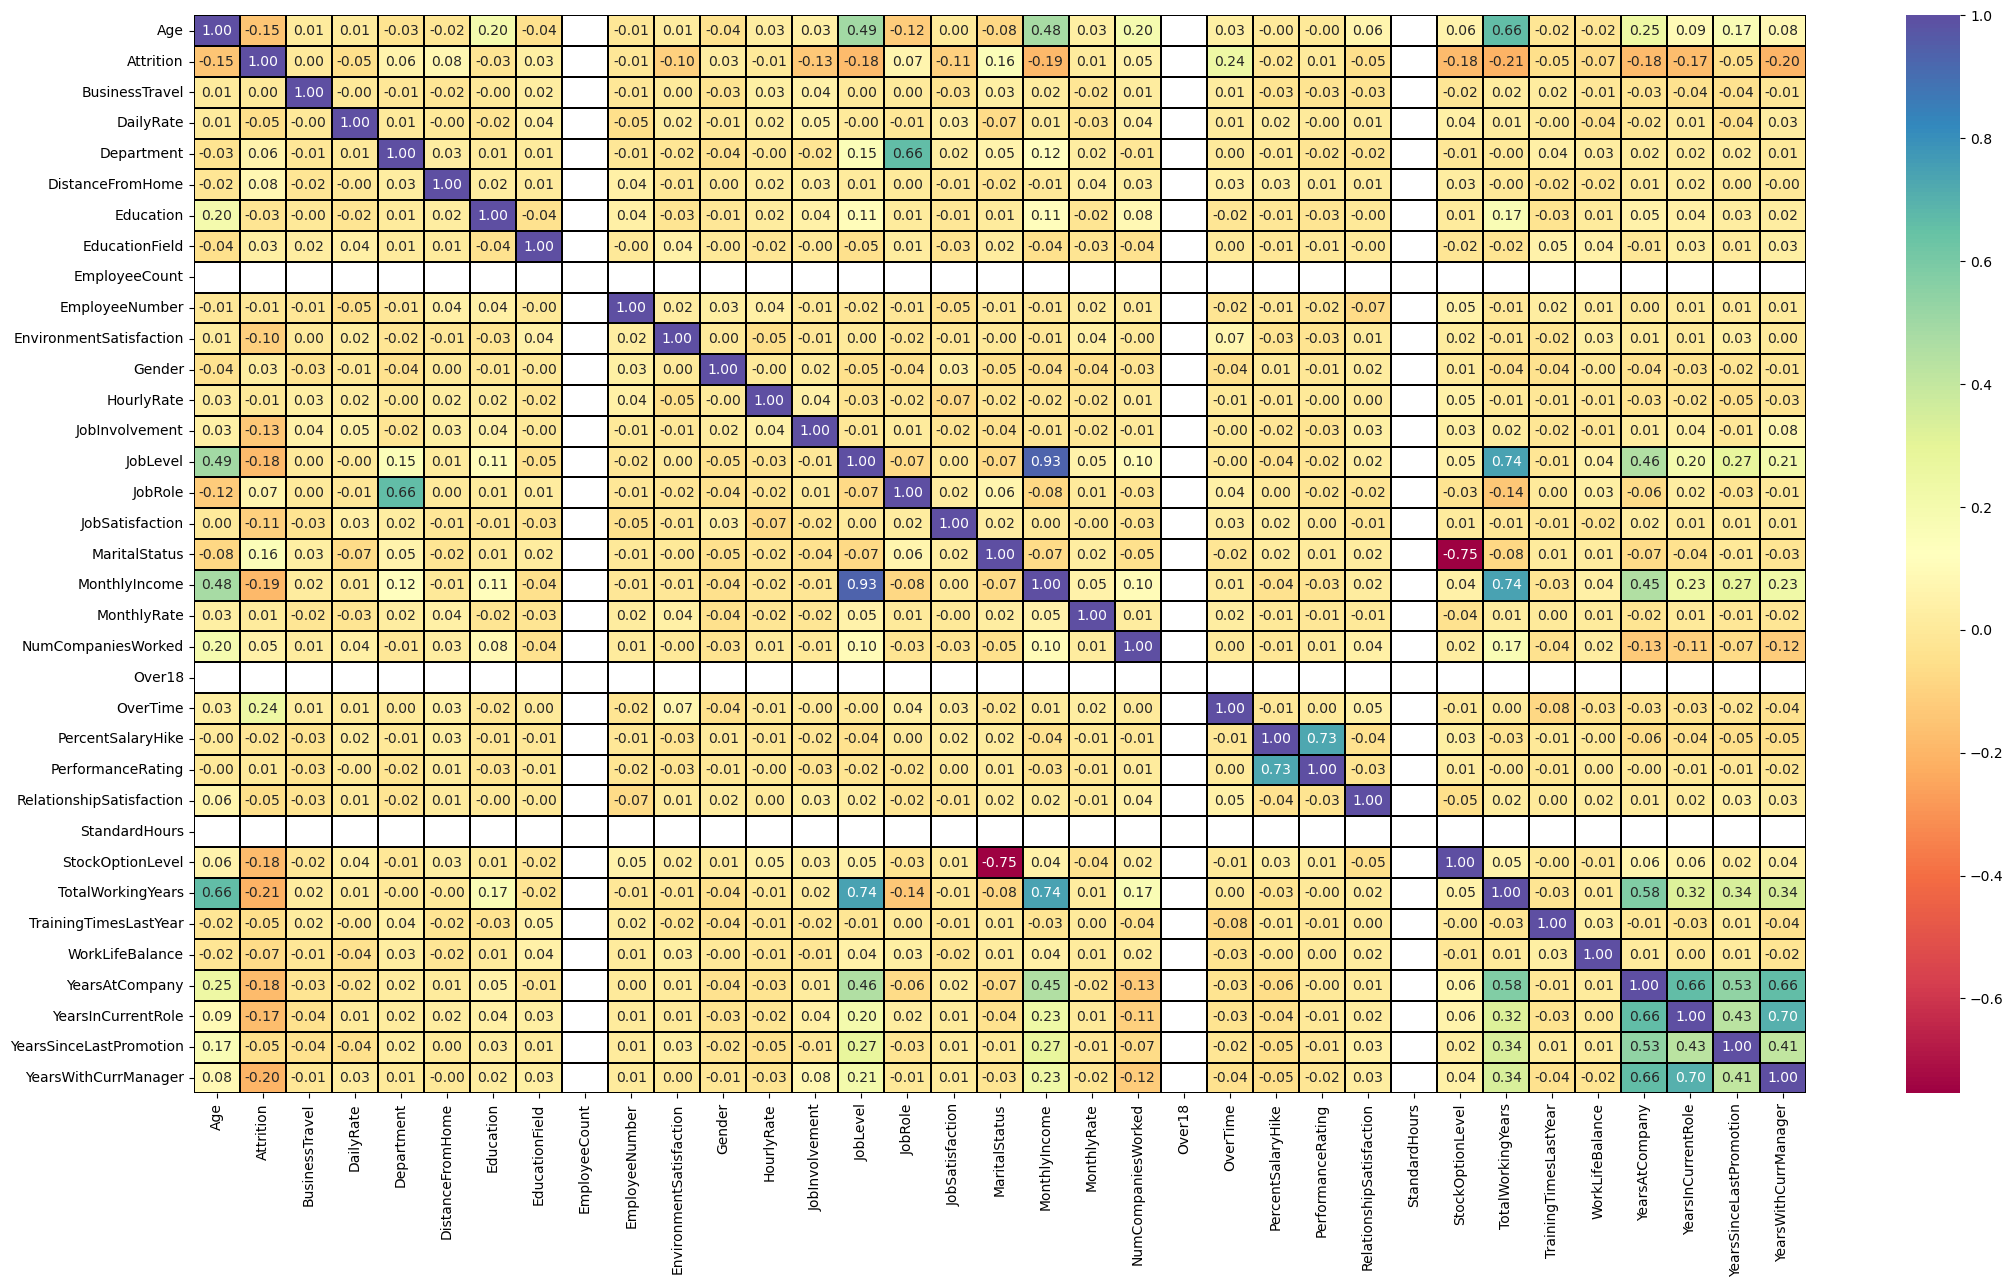

In [96]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

In [97]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.017521,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.072386,0.670212,-0.019621,-0.021490,0.277599,0.123155,0.178217,0.112849
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.079090,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.184391,-0.220336,-0.059478,-0.063939,-0.190852,-0.181580,-0.055223,-0.210795
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.012196,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.015151,0.045264,0.015240,-0.011256,-0.002484,-0.023023,-0.030144,0.004659
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.003634,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.039363,0.023035,0.002453,-0.037848,-0.011387,0.016788,-0.038943,0.031440
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.026189,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.013589,-0.008491,0.036875,0.026383,0.011446,0.015541,0.018416,0.002294
DistanceFromHome,-0.017521,0.079090,-0.012196,-0.003634,0.026189,1.000000,0.019881,0.007214,NaN,0.035129,...,0.009052,NaN,0.025370,-0.001288,-0.022502,-0.024142,0.009052,0.020242,0.001563,-0.003053
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.019881,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.015091,0.170609,-0.025100,0.009819,0.061038,0.044579,0.030448,0.032294
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.007214,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.018380,-0.016817,0.049195,0.041191,-0.006638,0.029586,0.010138,0.030772
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.035129,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.055034,-0.003171,0.023603,0.010309,0.008860,0.014058,0.009250,0.011708


<Axes: >

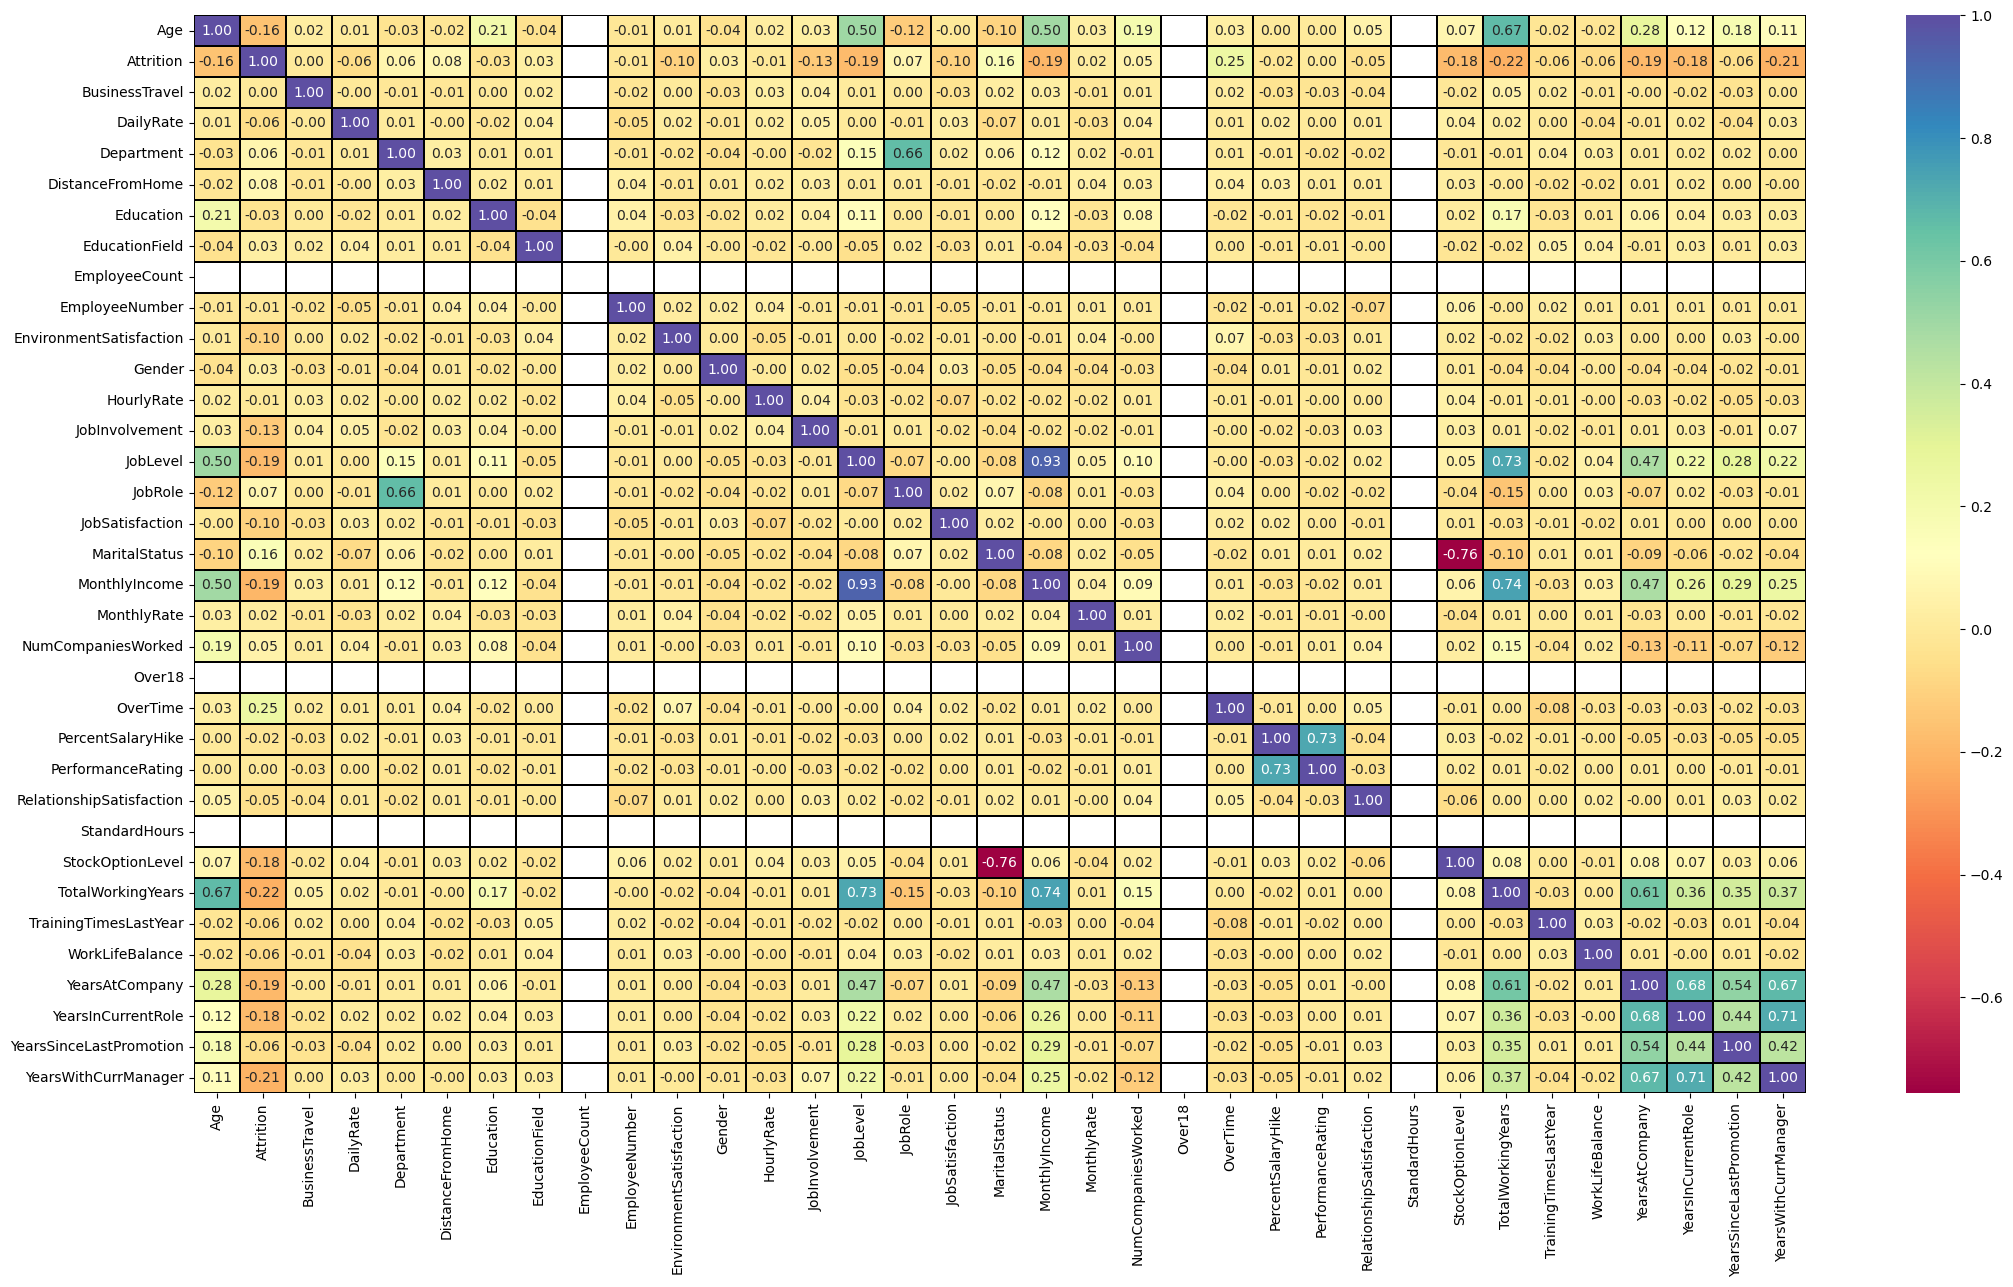

In [98]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for old dataset

In [ ]:
# 1) we can see from the above data that most of the column are not much correlated with each other
# 2) there may be some multicollinearity present b/w years at company , years in current role , years since last promotion and
#    years with curr manager
# 3) attrition which is label/target have also low correlation to other columns

In [100]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [101]:
a=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
a

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [104]:
x=df1.drop('Attrition',axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1.000000,2,1.0,1,1,2,...,1,80,0.0,2.000000,0,1,1.817121,1.166529,0.000000,1.195813
1,49,1.0,279,1.0,2.000000,1,1.0,1,2,3,...,4,80,1.0,2.154435,3,3,2.154435,1.241366,1.000000,1.241366
2,37,2.0,1373,1.0,1.259921,2,4.0,1,4,4,...,2,80,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000
3,33,1.0,1392,1.0,1.442250,4,1.0,1,5,4,...,3,80,0.0,2.000000,3,3,2.000000,1.241366,1.442250,0.000000
4,27,2.0,591,1.0,1.259921,1,3.0,1,7,1,...,4,80,1.0,1.817121,3,3,1.259921,1.080060,1.259921,1.080060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,2.843867,2,3.0,1,2061,3,...,3,80,1.0,2.571282,3,3,1.709976,1.080060,0.000000,1.129831
1466,39,2.0,613,1.0,1.817121,1,3.0,1,2062,4,...,1,80,1.0,2.080084,5,3,1.912931,1.241366,1.000000,1.241366
1467,27,2.0,155,1.0,1.587401,3,1.0,1,2064,2,...,2,80,1.0,1.817121,0,3,1.817121,1.080060,0.000000,1.129831
1468,49,1.0,1023,2.0,1.259921,3,3.0,1,2065,4,...,4,80,0.0,2.571282,3,2,2.080084,1.220285,0.000000,1.259921


In [105]:
y=df1['Attrition']
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1459, dtype: float64

In [106]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=pd.DataFrame(s.fit_transform(x),columns=a)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.436477,0.586439,0.740482,1.402297,-1.411199,-0.895253,-0.936437,0.0,-1.703106,-0.657804,...,-1.579719,0.0,-1.135581,-0.246371,-2.179096,-2.496965,0.108564,0.418273,-1.119398,0.508358
1,1.322178,-0.927923,-1.301137,-0.492102,0.159305,-1.871467,-0.936437,0.0,-1.701445,0.256230,...,1.194932,0.0,0.672739,0.050138,0.158053,0.339214,0.702561,0.589574,0.189825,0.609637
2,-0.006374,0.586439,1.412753,-0.492102,-1.002992,-0.895253,1.313170,0.0,-1.698122,1.170265,...,-0.654835,0.0,-1.135581,-0.413539,0.158053,0.339214,-3.091311,-2.251898,-1.119398,-2.150350
3,-0.449225,-0.927923,1.459887,-0.492102,-0.716644,1.057175,-0.936437,0.0,-1.696461,1.170265,...,0.270048,0.0,-1.135581,-0.246371,0.158053,0.339214,0.430608,0.589574,0.768828,-2.150350
4,-1.113501,0.586439,-0.527157,-0.492102,-1.002992,-1.871467,0.563301,0.0,-1.693138,-1.571839,...,1.194932,0.0,0.672739,-0.597492,0.158053,0.339214,-0.872641,0.220346,0.530120,0.250998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.117087,-0.927923,0.199689,-0.492102,1.484602,-0.895253,0.563301,0.0,1.719397,0.256230,...,0.270048,0.0,0.672739,0.850468,0.158053,0.339214,-0.080113,0.220346,-1.119398,0.361657
1455,0.215051,0.586439,-0.472582,-0.492102,-0.127908,-1.871467,0.563301,0.0,1.721059,1.170265,...,-1.579719,0.0,0.672739,-0.092613,1.716152,0.339214,0.277283,0.589574,0.189825,0.609637
1456,-1.113501,0.586439,-1.608744,-0.492102,-0.488683,0.080961,-0.936437,0.0,1.724381,-0.657804,...,-0.654835,0.0,0.672739,-0.597492,-2.179096,0.339214,0.108564,0.220346,-1.119398,0.361657
1457,1.322178,-0.927923,0.544507,1.402297,-1.002992,0.080961,0.563301,0.0,1.726043,1.170265,...,1.194932,0.0,-1.135581,0.850468,0.158053,-1.078876,0.571632,0.541320,-1.119398,0.650892


In [107]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.951238,Age
1,1.017526,BusinessTravel
2,1.026149,DailyRate
3,1.961793,Department
4,1.016421,DistanceFromHome
5,1.061692,Education
6,1.020582,EducationField
7,NaN,EmployeeCount
8,1.024190,EmployeeNumber
9,1.021785,EnvironmentSatisfaction


In [ ]:
# since vif values for all the columns are low we don't have to remove any columns fortunately

# EQUALING THE DATA

In [89]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [108]:
x1,y1=sm.fit_resample(x,y)

In [109]:
x1

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.436477,0.586439,0.740482,1.402297,-1.411199,-0.895253,-0.936437,0.0,-1.703106,-0.657804,...,-1.579719,0.0,-1.135581,-0.246371,-2.179096,-2.496965,0.108564,0.418273,-1.119398,0.508358
1,1.322178,-0.927923,-1.301137,-0.492102,0.159305,-1.871467,-0.936437,0.0,-1.701445,0.256230,...,1.194932,0.0,0.672739,0.050138,0.158053,0.339214,0.702561,0.589574,0.189825,0.609637
2,-0.006374,0.586439,1.412753,-0.492102,-1.002992,-0.895253,1.313170,0.0,-1.698122,1.170265,...,-0.654835,0.0,-1.135581,-0.413539,0.158053,0.339214,-3.091311,-2.251898,-1.119398,-2.150350
3,-0.449225,-0.927923,1.459887,-0.492102,-0.716644,1.057175,-0.936437,0.0,-1.696461,1.170265,...,0.270048,0.0,-1.135581,-0.246371,0.158053,0.339214,0.430608,0.589574,0.768828,-2.150350
4,-1.113501,0.586439,-0.527157,-0.492102,-1.002992,-1.871467,0.563301,0.0,-1.693138,-1.571839,...,1.194932,0.0,0.672739,-0.597492,0.158053,0.339214,-0.872641,0.220346,0.530120,0.250998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,-1.888489,-0.756700,0.080735,1.188104,0.298280,-0.139793,-0.101783,0.0,0.013939,1.170265,...,-0.445689,0.0,-1.135581,-1.723719,0.334221,0.339214,-0.924393,-0.059181,-0.971369,0.230872
2450,-0.979621,0.586439,0.267520,-0.492102,-1.088409,0.852902,0.877122,0.0,-0.512680,0.256230,...,1.194932,0.0,-1.135581,-0.721668,-0.167980,-1.078876,-0.667324,0.220346,0.458913,0.164097
2451,-1.140260,-0.545143,0.156341,-0.492102,-0.215612,-0.648499,0.942385,0.0,-0.106496,0.025193,...,-1.579719,0.0,0.791544,-0.171423,-0.620997,0.339214,0.391852,0.589574,0.491940,0.609637
2452,0.234606,0.586439,0.262390,-0.492102,-0.946838,0.080961,0.269196,0.0,0.830435,-0.102261,...,-1.216972,0.0,0.695968,-0.322610,-0.315448,0.617307,-0.172567,0.220346,0.189825,0.405548


In [110]:
y1

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2449    1.0
2450    1.0
2451    1.0
2452    1.0
2453    1.0
Name: Attrition, Length: 2454, dtype: float64

In [111]:
y1.value_counts()

Attrition
1.0    1227
0.0    1227
Name: count, dtype: int64

In [112]:
for i in x1.columns:
    print(x1[i].value_counts())

Age
-0.227799    84
-0.670650    82
-0.338512    77
-0.892075    73
-0.117087    69
             ..
-0.007669     1
-0.463431     1
-0.465089     1
-0.441354     1
-0.616646     1
Name: count, Length: 977, dtype: int64
BusinessTravel
 0.586439    1497
-0.927923     386
-2.442286     151
-1.106903       1
 0.184913       1
             ... 
-0.633028       1
 0.505809       1
 0.207436       1
 0.371113       1
 0.410282       1
Name: count, Length: 423, dtype: int64
DailyRate
-0.279087    6
 1.303602    5
-1.177102    5
 0.690868    5
-0.678480    5
            ..
-0.018850    1
 0.743653    1
 0.695355    1
 0.144742    1
-0.974664    1
Name: count, Length: 1878, dtype: int64
Department
-0.492102    1420
 1.402297     691
-2.386502      66
-0.581797       1
 0.355690       1
             ... 
 0.120670       1
-1.770411       1
-0.017986       1
 0.710369       1
 1.181933       1
Name: count, Length: 280, dtype: int64
DistanceFromHome
-1.002992    234
-1.411199    229
 0.285077     9

In [ ]:
# all values are equally distributed using imblearn resample

# MODEL BUILDING

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [115]:
maxaccu1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x1_train,y1_train)
    pred1=rfr.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxaccu1:
        maxaccu1=acc1
        maxrs1=i
print('best accuracy is',maxaccu1,'at random state',maxrs1)

best accuracy is 0.9565807327001357 at random state 88


In [117]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [118]:
#random forest classifier
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=88)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predrfc1))
print('confusion matrix',confusion_matrix(y1_test,predrfc1))
print('classification',classification_report(y1_test,predrfc1))

accuracy score 0.9552238805970149
confusion matrix [[363   7]
 [ 26 341]]
classification               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       370
         1.0       0.98      0.93      0.95       367

    accuracy                           0.96       737
   macro avg       0.96      0.96      0.96       737
weighted avg       0.96      0.96      0.96       737



In [128]:
lr= LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print(accuracy_score(y1_test,predlr1))
print(confusion_matrix(y1_test,predlr1))
print(classification_report(y1_test,predlr1))

0.7829036635006784
[[284  86]
 [ 74 293]]
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       370
         1.0       0.77      0.80      0.79       367

    accuracy                           0.78       737
   macro avg       0.78      0.78      0.78       737
weighted avg       0.78      0.78      0.78       737



In [129]:
svc= SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.9199457259158752
[[335  35]
 [ 24 343]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       370
         1.0       0.91      0.93      0.92       367

    accuracy                           0.92       737
   macro avg       0.92      0.92      0.92       737
weighted avg       0.92      0.92      0.92       737



In [130]:
gbc= GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.9416553595658074
[[357  13]
 [ 30 337]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       370
         1.0       0.96      0.92      0.94       367

    accuracy                           0.94       737
   macro avg       0.94      0.94      0.94       737
weighted avg       0.94      0.94      0.94       737



In [131]:
abc= AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.9063772048846676
[[335  35]
 [ 34 333]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       370
         1.0       0.90      0.91      0.91       367

    accuracy                           0.91       737
   macro avg       0.91      0.91      0.91       737
weighted avg       0.91      0.91      0.91       737



In [132]:
bc= BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.9104477611940298
[[352  18]
 [ 48 319]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       370
         1.0       0.95      0.87      0.91       367

    accuracy                           0.91       737
   macro avg       0.91      0.91      0.91       737
weighted avg       0.91      0.91      0.91       737



In [133]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.9742198100407056
[[358  12]
 [  7 360]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       370
         1.0       0.97      0.98      0.97       367

    accuracy                           0.97       737
   macro avg       0.97      0.97      0.97       737
weighted avg       0.97      0.97      0.97       737



In [134]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score
rfcscore1=cvs(rfc,x1,y1)
print(rfcscore1)
print(rfcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfcscore1.mean())

[0.78411405 0.98167006 0.9694501  0.97352342 0.82857143]
0.9074658132091941
differnce b/w accuracy score and cross val score 0.047758067387820846


In [136]:
lrscore1=cvs(lr,x1,y1)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.70468432 0.74745418 0.80855397 0.75152749 0.73673469]
0.7497909306288706
differnce b/w accuracy score and cross val score 0.033112732871807826


In [137]:
svcscore1=cvs(svc,x1,y1)
print(svcscore1)
print(svcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.86761711 0.92057026 0.91038697 0.89613035 0.9122449 ]
0.9013899164553806
differnce b/w accuracy score and cross val score 0.01855580946049462


In [138]:
gbcscore1=cvs(gbc,x1,y1)
print(gbcscore1)
print(gbcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.60692464 0.89409369 0.79226069 0.80040733 0.53265306]
0.7252678831206618
differnce b/w accuracy score and cross val score 0.21638747644514555


In [139]:
abcscore1=cvs(abc,x1,y1)
print(abcscore1)
print(abcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.17515275 0.82281059 0.75560081 0.71283096 0.47959184]
0.5891973897501975
differnce b/w accuracy score and cross val score 0.31717981513447


In [140]:
bcscore1=cvs(bc,x1,y1)
print(bcscore1)
print(bcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.71486762 0.92260692 0.89002037 0.75763747 0.56530612]
0.7700877010682073
differnce b/w accuracy score and cross val score 0.14036006012582247


In [141]:
etcscore1=cvs(etc,x1,y1)
print(etcscore1)
print(etcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.92260692 0.97148676 0.96537678 0.96334012 0.98367347]
0.9612968120038239
differnce b/w accuracy score and cross val score 0.012922998036881683


In [ ]:
#                                                 rfc       lr      svc       gbc      adc      bc     etc
# accuracy score(%)                              95.52    78.29    91.99     94.16   90.63    91.04    97.42    
# cvs score(%)                                   90.74    74.97    90.13     72.52   58.91    77.00    96.12
# difference b/w accuracy score and cvs score(%) 0.047    0.033    0.018     21.63   0.317    14.03    0.012

In [ ]:
# 1) best model comes out to be etc as the accuracy score is 97.42 and cvs score is 96.12 and difference is 0.012
# 2) other best model can be rfc , svc , adc 
# 3) model is build good there are less errors and the prediction is good as well

# MODL BUILDING ON THE OLD DATASET

In [142]:
x=df.drop('Attrition',axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1.000000,2,1.0,1,1,2,...,1,80,0.0,2.000000,0,1,1.817121,1.166529,0.000000,1.195813
1,49,1.0,279,1.0,2.000000,1,1.0,1,2,3,...,4,80,1.0,2.154435,3,3,2.154435,1.241366,1.000000,1.241366
2,37,2.0,1373,1.0,1.259921,2,4.0,1,4,4,...,2,80,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000
3,33,1.0,1392,1.0,1.442250,4,1.0,1,5,4,...,3,80,0.0,2.000000,3,3,2.000000,1.241366,1.442250,0.000000
4,27,2.0,591,1.0,1.259921,1,3.0,1,7,1,...,4,80,1.0,1.817121,3,3,1.259921,1.080060,1.259921,1.080060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,2.843867,2,3.0,1,2061,3,...,3,80,1.0,2.571282,3,3,1.709976,1.080060,0.000000,1.129831
1466,39,2.0,613,1.0,1.817121,1,3.0,1,2062,4,...,1,80,1.0,2.080084,5,3,1.912931,1.241366,1.000000,1.241366
1467,27,2.0,155,1.0,1.587401,3,1.0,1,2064,2,...,2,80,1.0,1.817121,0,3,1.817121,1.080060,0.000000,1.129831
1468,49,1.0,1023,2.0,1.259921,3,3.0,1,2065,4,...,4,80,0.0,2.571282,3,2,2.080084,1.220285,0.000000,1.259921


In [122]:
y=df['Attrition']
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [123]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is',maxaccu,'at random state',maxrs)

best accuracy is 0.8956916099773242 at random state 123


In [125]:
#random forest classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=154)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('accuracy score',accuracy_score(y_test,predrfc))
print('confusion matrix',confusion_matrix(y_test,predrfc))
print('classification',classification_report(y_test,predrfc))

accuracy score 0.8344671201814059
confusion matrix [[361   1]
 [ 72   7]]
classification               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       362
         1.0       0.88      0.09      0.16        79

    accuracy                           0.83       441
   macro avg       0.85      0.54      0.53       441
weighted avg       0.84      0.83      0.77       441



In [126]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score
rfcscore=cvs(rfc,x,y)
print(rfcscore)
print(rfcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predrfc)-rfcscore.mean())

[0.86054422 0.86054422 0.86734694 0.85034014 0.85034014]
0.8578231292517007
differnce b/w accuracy score and cross val score -0.02335600907029478


# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [144]:
import joblib
joblib.dump(etc,'HR ANALYTICS PROJECT ATTRITION PREDICTION')

['HR ANALYTICS PROJECT ATTRITION PREDICTION']

In [145]:
model=joblib.load('HR ANALYTICS PROJECT ATTRITION PREDICTION')
prediction=model.predict(x1_test)
prediction
# prediction foe x1_test

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1.

In [ ]:
# prediction vaues:- 1 means yes , 0 means no

In [146]:
x_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,2.0,1083,1.0,3.072317,1,1.0,1,1514,3,...,2,80,1.259921,2.000000,2,2,2.000000,1.220285,1.000000,1.241366
717,27,2.0,1134,1.0,2.519842,4,5.0,1,1001,3,...,2,80,1.000000,1.587401,2,3,1.259921,1.080060,1.259921,1.080060
1083,40,2.0,676,1.0,2.080084,4,1.0,1,1534,4,...,2,80,0.000000,2.466212,3,1,1.709976,1.166529,1.000000,0.000000
553,40,2.0,804,1.0,1.259921,1,3.0,1,763,4,...,4,80,0.000000,1.709976,2,2,1.587401,1.080060,1.259921,1.129831
349,29,0.0,746,2.0,1.259921,3,1.0,1,469,4,...,1,80,1.000000,1.587401,3,2,1.587401,1.129831,0.000000,1.080060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,42,1.0,748,1.0,2.080084,2,3.0,1,1480,1,...,3,80,0.000000,2.289428,3,3,2.289428,1.276518,1.709976,1.259921
474,24,2.0,691,1.0,2.843867,3,3.0,1,639,2,...,2,80,1.259921,1.817121,3,3,1.817121,1.195813,1.000000,1.166529
1314,45,0.0,589,2.0,1.259921,4,1.0,1,1845,3,...,2,80,1.259921,2.154435,3,4,2.000000,1.241366,1.709976,1.241366
1173,36,2.0,711,1.0,1.709976,4,1.0,1,1651,2,...,3,80,1.259921,2.080084,6,3,1.442250,1.080060,0.000000,1.080060
